In [ ]:
%%bash
pip3 install ipyleaflet
jupyter nbextension enable --py --sys-prefix ipyleaflet

In [1]:
from ipyleaflet import Map, basemaps
Map(center=(55.7522200, 37.6155600), zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

Map(center=[55.75222, 37.61556], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

---------
-------
-----

Данные из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")

In [3]:
data = pd.read_csv('NY taxi_train.csv')
data.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [4]:
data.shape

(1458644, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


dropoff_datetime был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, удалим ее:

In [6]:
data = data.drop(columns=["dropoff_datetime"])
data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
data.shape

(1458644, 10)

В pickup_datetime записаны дата и время начала поездки. Чтобы с ней было удобно работать, преобразуем даты в datetime-объекты:

In [8]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
print(type(data['pickup_datetime']))
print(type(data['pickup_datetime'][0]))
data['pickup_datetime'][0]

<class 'pandas.core.series.Series'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Timestamp('2016-03-14 17:24:55')

In [9]:
data["trip_duration"].value_counts()

368      1624
408      1584
348      1582
367      1581
358      1577
399      1573
418      1570
417      1568
388      1567
344      1561
327      1560
449      1560
334      1556
369      1556
378      1550
422      1550
352      1549
438      1547
424      1547
357      1542
403      1540
362      1540
376      1539
353      1539
354      1538
386      1538
332      1538
398      1536
448      1536
375      1533
         ... 
85932       1
83236       1
5390        1
13184       1
6896        1
83235       1
29576       1
4361        1
5872        1
6020        1
7044        1
4999        1
85933       1
6753        1
85304       1
7440        1
6416        1
81205       1
7441        1
86328       1
82860       1
6418        1
4370        1
6022        1
5873        1
85305       1
83256       1
83884       1
6419        1
8522        1
Name: trip_duration, Length: 7417, dtype: int64

В колонке trip_duration записано целевое значение, которое мы хотим предсказывать. 
<br>Разобьем выборку на обучающую и тестовую в отношении 7:3:

In [10]:
from sklearn.model_selection import train_test_split

y = data["trip_duration"]
X = data.drop(columns=["trip_duration"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Посмотрим на распределение таргета в обучающей выборке. Для этого нарисуем его гистограмму:

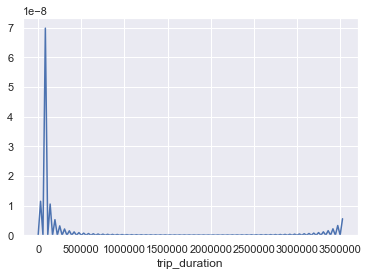

In [11]:
sns.distplot(y_train, hist=False)

Для таких графиков идеологически правильнее bar chart'ы.
Потому что вот эти вот скачки.

In [12]:
# sns.barplot(x='id', y='trip_duration', data=data)

В соревновании в качестве метрики качества использовалось RMSLE:$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

In [13]:
from sklearn.metrics import make_scorer

def rmsle(y_true, y_pred):
    error = (np.log(y_true + 1) - np.log(y_pred)) ** 2
    
    return np.sqrt(np.mean(error))

rmsle_scorer = make_scorer(
    rmsle,
    greater_is_better=False
)

В sklearn каждая из метрик оптимизирует среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее логарифм. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

У логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавим к нашим выборкам колонки log_trip_duration и нарисуем гистограмму модифицированного таргета по обучающей выборке:

In [14]:
log_trip_duration = []

for i in range(len(data)):
    elem = np.log1p(data['trip_duration'][i])
    log_trip_duration.append(elem)

data['log_trip_duration'] = log_trip_duration
data.head(10)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642
5,id0801584,2,2016-01-30 22:01:40,6,-73.982857,40.742195,-73.992081,40.749184,N,443,6.095825
6,id1813257,1,2016-06-17 22:34:59,4,-73.969017,40.757839,-73.957405,40.765896,N,341,5.834811
7,id1324603,2,2016-05-21 07:54:58,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,7.347300
8,id1301050,1,2016-05-27 23:12:23,1,-73.999481,40.738400,-73.985786,40.732815,N,255,5.545177
9,id0012891,2,2016-03-10 21:45:01,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,7.111512


In [15]:
y_log = data["log_trip_duration"]
X_log = data.drop(columns=["log_trip_duration"])

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.3, random_state=10)

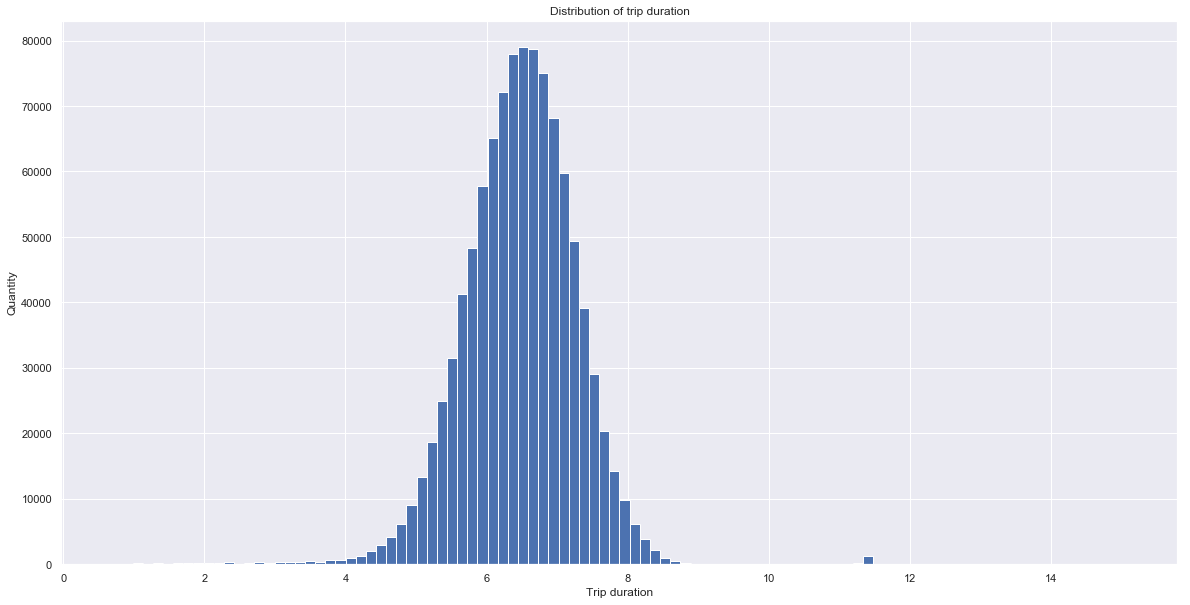

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

ax.set_title('Distribution of trip duration')
ax.set_ylabel('Quantity')
ax.set_xlabel('Trip duration')

ax.hist(y_train_log, bins=100)
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [17]:
best_constant = y_train_log.mean()
print("Test RMSLE with best constant = %.4f" % rmsle(y_test_log, best_constant))
print("Train RMSLE with best constant = %.4f" % rmsle(y_train_log, best_constant))

Test RMSLE with best constant = 0.1782
Train RMSLE with best constant = 0.1783


----
-----
----

Для начала посмотрим, сколько всего было поездок в каждый из дней. 
<br>Построим сначала график зависимости количества поездок от месяца:

In [18]:
i = 0

for d in data['pickup_datetime']:
    i+=1
    print(d, d.day, sep='    ')
    if (i == 10):
        break

2016-03-14 17:24:55    14
2016-06-12 00:43:35    12
2016-01-19 11:35:24    19
2016-04-06 19:32:31    6
2016-03-26 13:30:55    26
2016-01-30 22:01:40    30
2016-06-17 22:34:59    17
2016-05-21 07:54:58    21
2016-05-27 23:12:23    27
2016-03-10 21:45:01    10


*1st way:*

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16.0, 10.0)

data['pickup_datetime'].groupby(data['pickup_datetime'].dt.month).count().plot.bar()

*2nd way:*

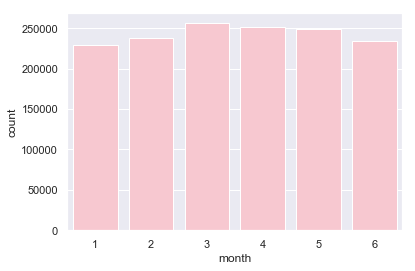

In [19]:
d = data['pickup_datetime']
df = pd.DataFrame(d)
df['month'] = pd.DatetimeIndex(df['pickup_datetime']).month

sns.countplot(x='month', data=df, color='Pink')

Построим теперь график зависимости количества поездок от дня в году:

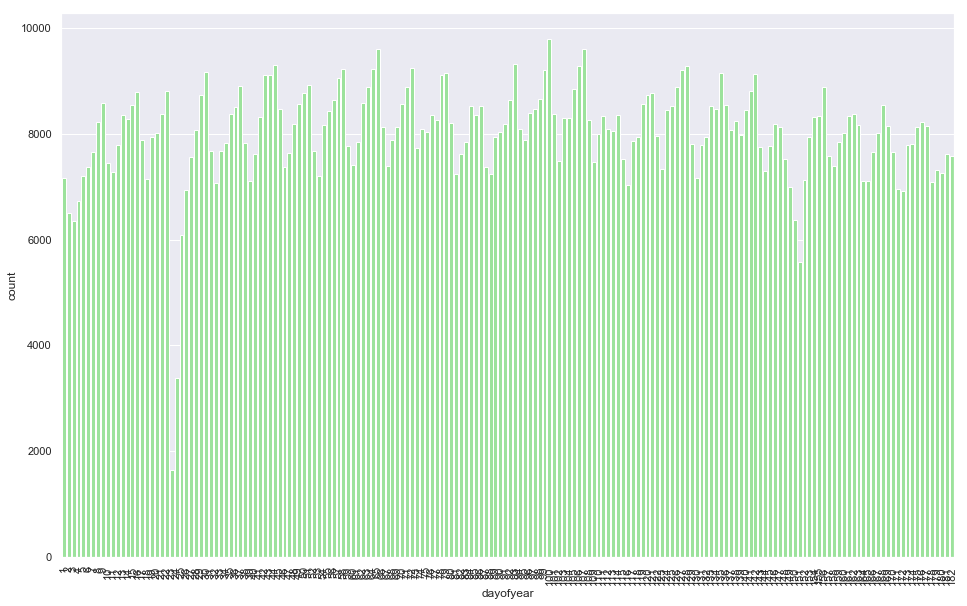

In [20]:
d = data['pickup_datetime']
df = pd.DataFrame(d)
df['dayofyear'] = pd.DatetimeIndex(df['pickup_datetime']).dayofyear

plot = sns.countplot(x='dayofyear', data=df, color='LightGreen')
plot.figure.set_size_inches(16, 10)
for item in plot.get_xticklabels():
    item.set_rotation(90)

Нарисуем графики зависимости количества поездок от дня недели и от часов в сутках:

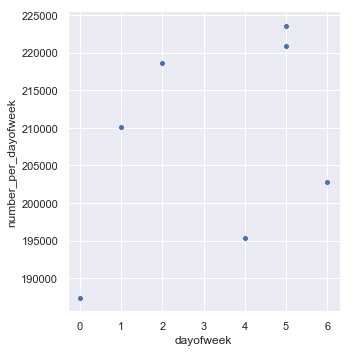

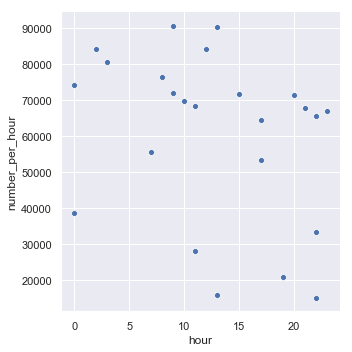

In [21]:
d = data['pickup_datetime']
df = pd.DataFrame(d)
df['dayofweek'] = pd.DatetimeIndex(df['pickup_datetime']).dayofweek
df['hour'] = pd.DatetimeIndex(df['pickup_datetime']).hour

df['number_per_dayofweek'] = df['dayofweek'].value_counts()
df['number_per_dayofweek'] = df['number_per_dayofweek'].dropna()
df['number_per_hour'] = df['hour'].value_counts()
df['number_per_hour'] = df['number_per_hour'].dropna()

plot1 = sns.relplot(x="dayofweek", y="number_per_dayofweek", data=df)
plot2 = sns.relplot(x="hour", y="number_per_hour", data=df)

Нарисуем на одном графике зависимости количества поездок от часа в сутках для разных месяцев 
<br>(разные кривые соответствуют разным месяцам):

In [22]:
import warnings

warnings.filterwarnings('ignore')

In [23]:
import calendar

X_train_log['weekday'] = X_train_log.apply(lambda row: row.pickup_datetime.weekday(), axis=1)
X_test_log['weekday'] = X_test_log.apply(lambda row: row.pickup_datetime.weekday(), axis=1)

In [24]:
X_train_log['hour'] =  X_train_log.apply(lambda row: row.pickup_datetime.hour, axis=1)
X_test_log['hour'] =  X_test_log.apply(lambda row: row.pickup_datetime.hour, axis=1)

In [25]:
raw_weekday_cnt = pd.DataFrame()
raw_weekday_cnt['weekday'] = X_train_log.weekday
raw_weekday_cnt['number_of_trips'] = 1

weekday_cnt = raw_weekday_cnt.groupby('weekday', as_index=False).agg({
                                    'number_of_trips': 'sum'
                                    })

weekday_cnt.sample()

,weekday,number_of_trips
0,0,131344


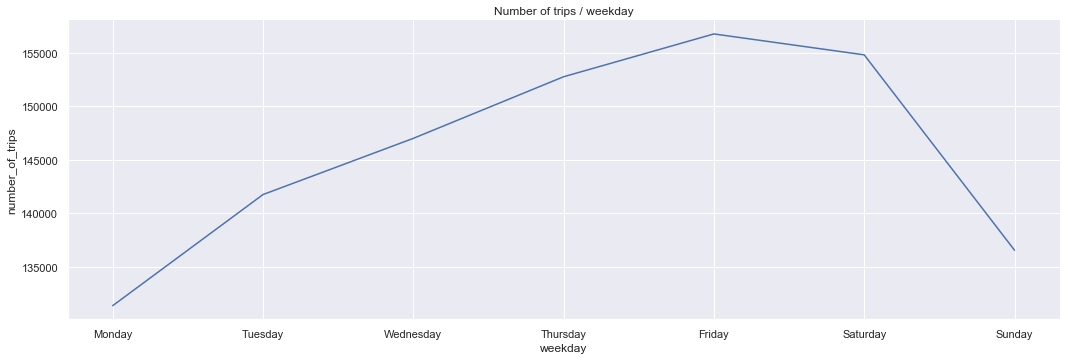

In [26]:
g = sns.relplot(data=weekday_cnt, x="weekday", y="number_of_trips", kind='line', aspect=3)
plt.title("Number of trips / weekday")
plt.xticks(np.arange(7), calendar.day_name[0:7])
plt.show()

Нарисуем на одном графике зависимости количества поездок от часа в сутках для разных дней недели 
<br>(разные кривые соответствуют разным неделям):

In [27]:
raw_hour_cnt = pd.DataFrame()
raw_hour_cnt['hour'] = X_train_log.hour
raw_hour_cnt['number_of_trips'] = 1

hour_cnt = raw_hour_cnt.groupby('hour', as_index=False).agg({
                                'number_of_trips': 'sum'
                                })

hour_cnt.sample()

,hour,number_of_trips
11,11,47984


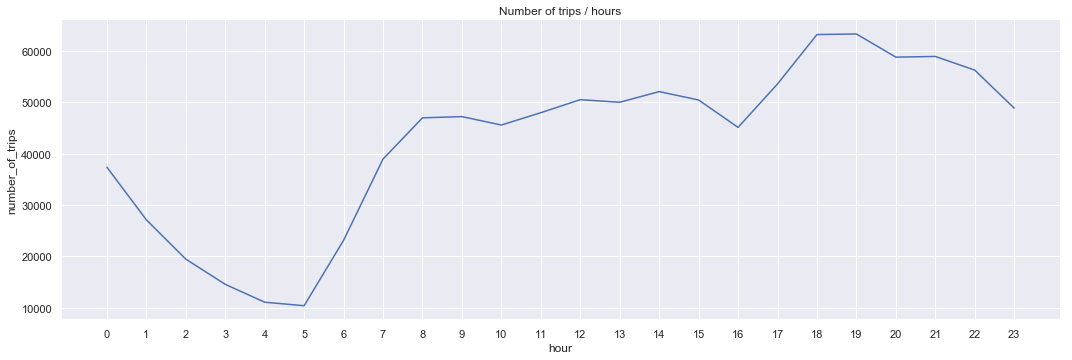

In [28]:
g = sns.relplot(data=hour_cnt, x="hour", y="number_of_trips", kind='line', aspect=3)
plt.title("Number of trips / hours")
plt.xticks(np.arange(24))
plt.show()

Нарисуем на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствуют разным месяцам):

In [29]:
X_train_log['month'] =  X_train_log.apply(lambda row: row.pickup_datetime.month, axis=1)
X_test_log['month'] =  X_test_log.apply(lambda row: row.pickup_datetime.month, axis=1)

In [30]:
raw_hour_month_cnt = pd.DataFrame()
raw_hour_month_cnt['hour'] = X_train_log.hour
raw_hour_month_cnt['month'] = X_train_log.apply(lambda row: calendar.month_name[row.month], axis=1)
raw_hour_month_cnt['number'] = 1

In [31]:
hour_month_cnt = raw_hour_month_cnt.groupby(['month', 'hour'], as_index=False).agg({
                                            'number': 'sum'
                                            })
hour_month_cnt.sample()

,month,hour,number
50,January,2,3349


Text(0.5, 1.0, 'Number of trips in diffenet months depends on time')

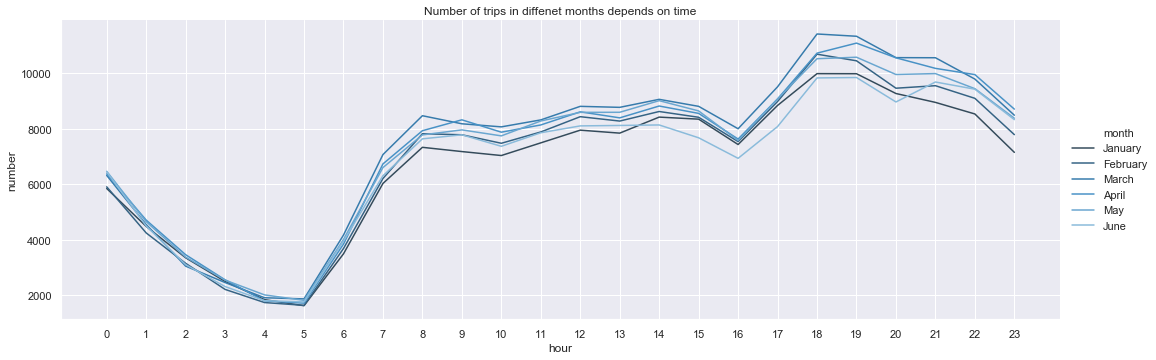

In [32]:
g = sns.relplot(
                data=hour_month_cnt, 
                x="hour", y="number", 
                kind='line', 
                hue="month",
                hue_order=calendar.month_name[1:7],
                aspect=3, 
                palette=sns.color_palette("Blues_d", n_colors=6)
                )

plt.xticks(np.arange(24))
plt.title("Number of trips in diffenet months depends on time")

Нарисуем на одном графике зависимости количества поездок от часа в сутках для разных дней недели:

In [33]:
raw_hour_weekday_cnt = pd.DataFrame()
raw_hour_weekday_cnt['hour'] = X_train_log.hour
raw_hour_weekday_cnt['weekday'] = X_train_log.apply(lambda x: calendar.day_name[x.weekday], axis=1)
raw_hour_weekday_cnt['number'] = 1

In [34]:
hour_weekday_cnt = raw_hour_weekday_cnt.groupby(['weekday', 'hour'], as_index=False).agg({
                                                'number': 'sum'
                                                })
hour_weekday_cnt.sample()

,weekday,hour,number
126,Tuesday,6,3982


([<matplotlib.axis.XTick at 0x1a37334f98>,
 <a list of 24 Text xticklabel objects>)

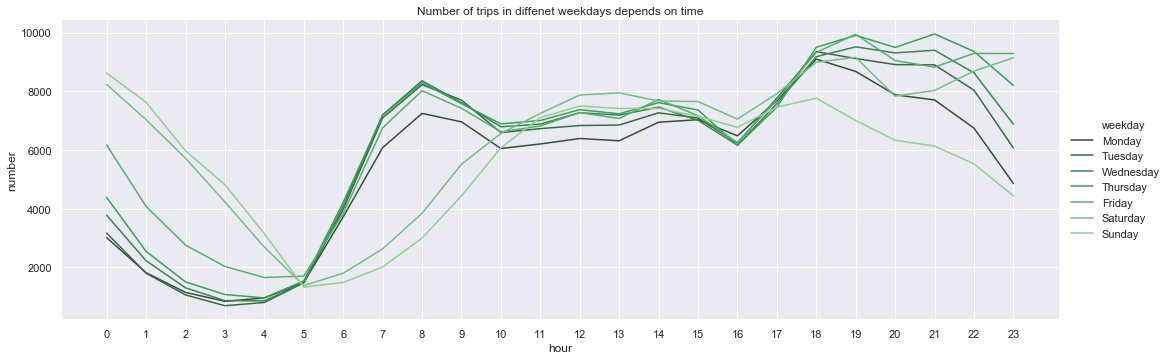

In [35]:
g = sns.relplot(
                data=hour_weekday_cnt, 
                x="hour", y="number", 
                kind='line', 
                hue="weekday",
                hue_order=calendar.day_name,
                aspect=3, 
                palette=sns.color_palette("Greens_d", n_colors=7)
                )

plt.title("Number of trips in diffenet weekdays depends on time")
plt.xticks(np.arange(24))

По обучающей выборке нарисуем график зависимости среднего логарифма времени поездки от дня недели:

In [36]:
target_weekday = pd.DataFrame()
target_weekday['weekday'] = X_train_log.weekday
target_weekday['log_trip_duration'] = y_train_log
grouped_target_weekday = target_weekday.groupby('weekday').agg({
                                                                'log_trip_duration': 'mean'
                                                                })

In [37]:
grouped_target_weekday.reset_index(inplace=True)
grouped_target_weekday.sample()

,weekday,log_trip_duration
4,4,6.500187


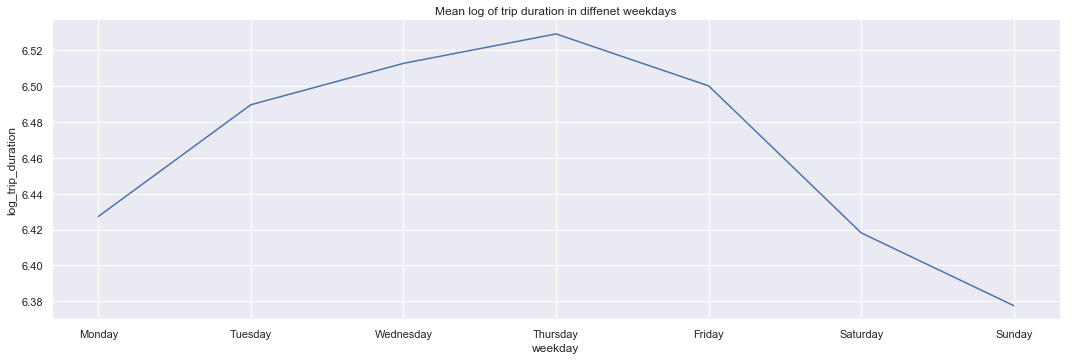

In [38]:
g = sns.relplot(
                data=grouped_target_weekday, 
                x="weekday", y="log_trip_duration", 
                kind='line',
                aspect=3
                )

plt.title("Mean log of trip duration in diffenet weekdays")
plt.xticks(np.arange(7), calendar.day_name[0:7])
plt.show()

По обучающей выборке нарисуем график зависимости среднего логарифма времени поездки от часа в сутках:

In [39]:
target_hour = pd.DataFrame()
target_hour['hour'] = X_train_log.hour
target_hour['log_trip_duration'] = y_train_log
grouped_target_hour = target_hour.groupby('hour').agg({
                                                        'log_trip_duration': 'mean'
                                                      })

grouped_target_hour.reset_index(inplace=True)
grouped_target_hour.sample()

,hour,log_trip_duration
13,13,6.538514


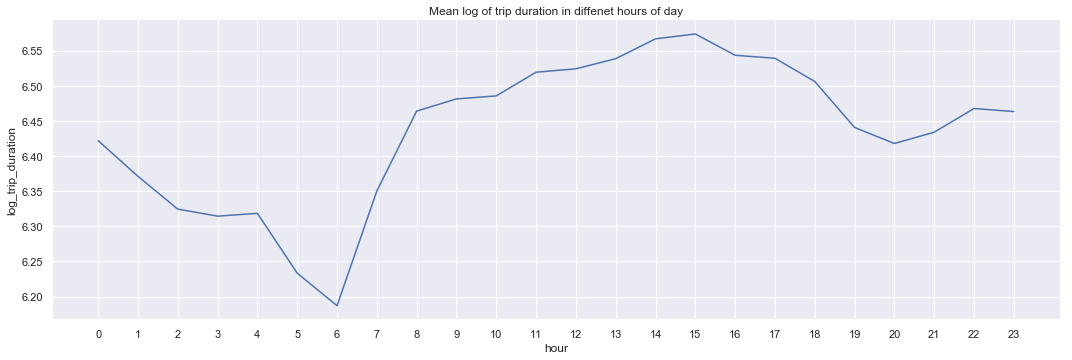

In [40]:
g = sns.relplot(
                data=grouped_target_hour, 
                x="hour", y="log_trip_duration", 
                kind='line',
                aspect=3
                )

plt.title("Mean log of trip duration in diffenet hours of day")
plt.xticks(np.arange(24))
plt.show()

По обучающей выборке нарисуем график зависимости среднего логарифма времени поездки от дня в году:

In [41]:
X_train_log['year_day'] = X_train_log.apply(lambda row: row.pickup_datetime.timetuple().tm_yday, axis=1)
X_test_log['year_day'] = X_test_log.apply(lambda row: row.pickup_datetime.timetuple().tm_yday, axis=1)

year_day_names = X_train_log.apply(
                            lambda row: row.pickup_datetime.strftime("%Y-%m-%d"), axis=1
                              ).drop_duplicates() \
                                .sort_values() \
                                .reset_index()[0]

In [42]:
target_day = pd.DataFrame()
target_day['day'] = X_train_log.year_day
target_day['log_trip_duration'] = y_train_log
grouped_target_day = target_day.groupby('day').agg({
                                                    'log_trip_duration': 'mean'
                                                    })

grouped_target_day.reset_index(inplace=True)
grouped_target_day.sample()

,day,log_trip_duration
132,133,6.61028


Text(0.5, 1.0, 'Mean log of trip duration in diffenet days')

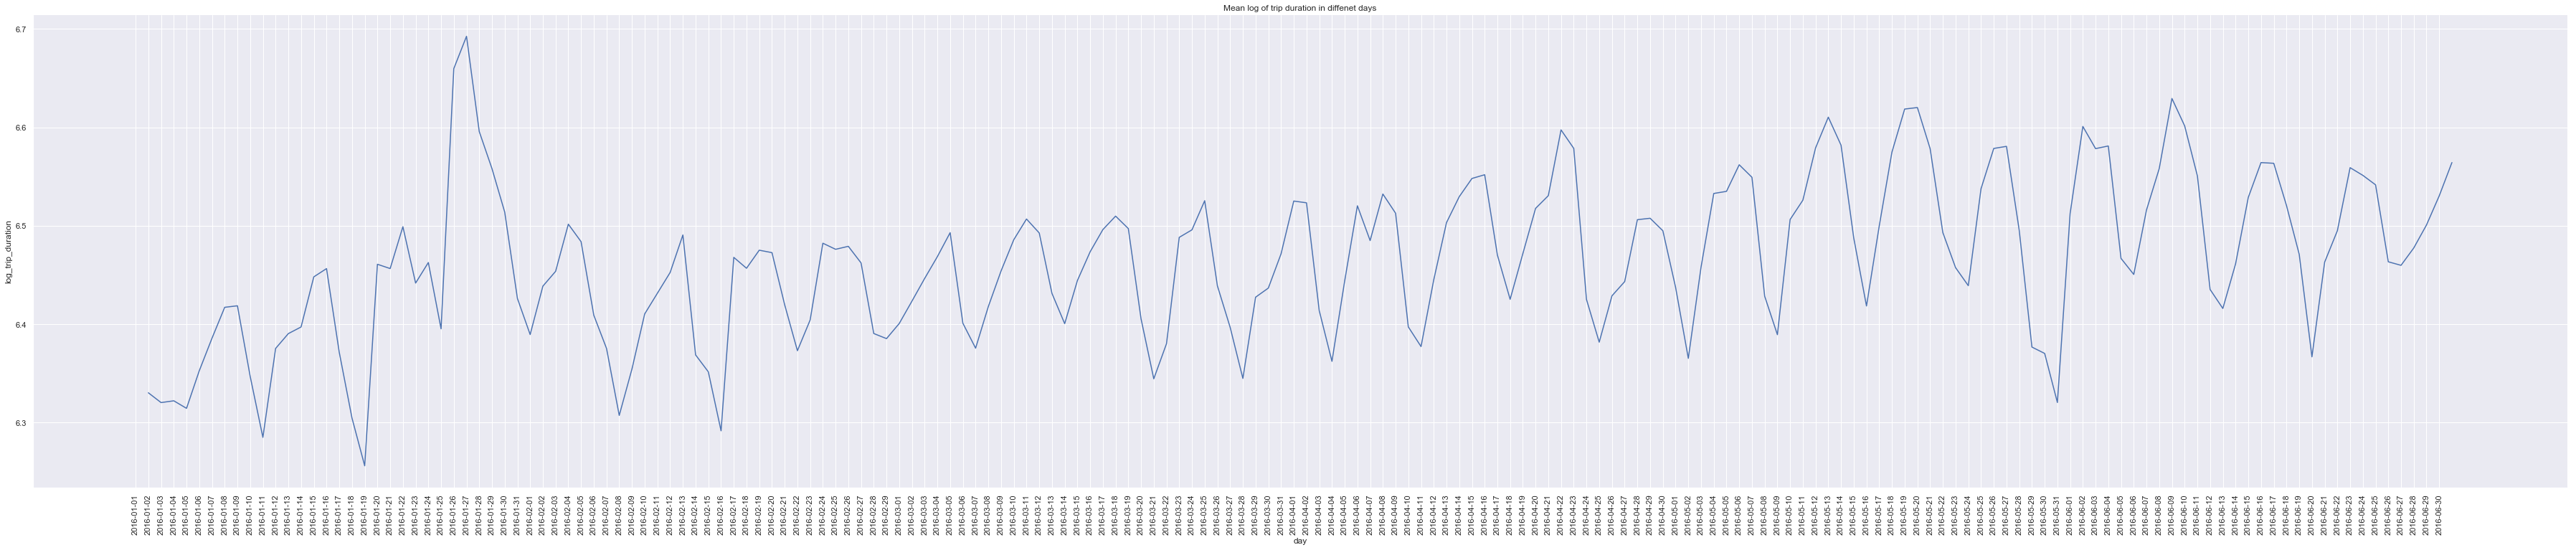

In [43]:
g = sns.relplot(
                data=grouped_target_day, 
                x="day", y="log_trip_duration", 
                kind='line',
                aspect=5,
                height=10
                )

plt.xticks(np.arange(182), year_day_names, rotation=90)
plt.title("Mean log of trip duration in diffenet days")

Добавим следующий признак на основе pickup_datetime:
    - Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)

In [44]:
X_train_log['blizzard'] = ((22 <= X_train_log.loc[:,'year_day']) & (X_train_log.loc[:,'year_day'] <= 24)).astype('int64')
X_test_log['blizzard'] =  ((22 <= X_test_log.loc[:,'year_day']) & (X_test_log.loc[:,'year_day'] <= 24)).astype('int64')

X_train_log['summer_anomaly'] =  ((149 <= X_train_log.loc[:,'year_day']) & (X_train_log.loc[:,'year_day'] <= 150)).astype('int64')
X_test_log['summer_anomaly'] =  ((149 <= X_test_log.loc[:,'year_day']) & (X_test_log.loc[:,'year_day'] <= 150)).astype('int64')

In [45]:
X_train_log.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,hour,month,year_day,blizzard,summer_anomaly
824746,id2365163,2,2016-03-27 00:25:29,3,-73.996986,40.742210,-73.987740,40.710659,N,1254,6,0,3,87,0,0
645821,id3126187,2,2016-03-18 20:44:12,1,-73.989929,40.741760,-73.977280,40.783600,N,970,4,20,3,78,0,0
691846,id2588127,2,2016-04-15 18:26:12,2,-73.972366,40.750725,-73.861832,40.768387,N,2084,4,18,4,106,0,0
1147931,id0915715,2,2016-03-24 14:28:34,1,-73.982361,40.776901,-73.975128,40.760921,N,980,3,14,3,84,0,0
183569,id3758776,1,2016-04-28 13:53:52,1,-73.973778,40.764374,-73.966957,40.761024,N,481,3,13,4,119,0,0


In [46]:
X_test_log.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,hour,month,year_day,blizzard,summer_anomaly
112342,id2631171,2,2016-01-23 00:09:14,1,-74.006615,40.731712,-73.991890,40.727161,N,660,5,0,1,23,1,0
840803,id2892416,1,2016-02-10 19:24:14,3,-73.963203,40.777924,-74.004059,40.747654,N,1833,2,19,2,41,0,0
184538,id3095142,2,2016-05-12 06:39:26,1,-73.987595,40.719822,-74.010994,40.716148,N,490,3,6,5,133,0,0
512001,id3803823,2,2016-01-21 08:31:03,1,-73.969055,40.763618,-73.974129,40.778679,N,767,3,8,1,21,0,0
776055,id3155730,2,2016-01-02 13:12:33,2,-73.950165,40.775635,-73.944534,40.779636,N,199,5,13,1,2,0,0


Обучим Ridge-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью OneHotEncoder. 
<br>Численные признаки отмасштабируем с помощью StandardScaler. Используем только выделенные нами признаки (они последние).

In [47]:
features = ['year_day', 'hour', 'weekday', 'month', 'blizzard', 'summer_anomaly']

categorical_features = ['hour', 'weekday', 'month', 'blizzard', 'summer_anomaly']
numeric_features = ['year_day']

In [48]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


column_transformer = ColumnTransformer([
                                        ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
                                        ('scaling', StandardScaler(), numeric_features)
                                       ])

pipeline = Pipeline(steps=[
                            ('ohe_and_scaling', column_transformer),
                            ('regression', Ridge())
                          ])

model = pipeline.fit(X_train_log[features], y_train_log)
y_pred = model.predict(X_train_log[features])
print("Train RMSLE = %.4f" % rmsle(y_train_log, y_pred))
y_pred = model.predict(X_test_log[features])
print("Test RMSLE = %.4f" % rmsle(y_test_log, y_pred))

Train RMSLE = 0.1779
Test RMSLE = 0.1777


На константе было:
<br>Train RMSLE with best constant = 0.1783
<br>Test RMSLE with best constant = 0.1782

Ннда, немногим меньше ошибка:/

----------------------
---------------
----------

Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки:

In [49]:
from ipyleaflet import Circle, LayerGroup

In [50]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    center = (data[latitude_column].mean(), data[longitude_column].mean())
    result_map = Map(center=center, zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

    circles = []
    for _, row in data.iterrows():
        circles.append(Circle(
            location=(row[latitude_column], row[longitude_column]),
            fill_color=color,
            fill_opacity=0.2,
            radius=300,
            stroke=False
        ))
    circles_layer = LayerGroup(layers=circles)
    result_map.add_layer(circles_layer)

    return result_map

In [51]:
show_circles_on_map(data.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

Map(center=[40.75066110229492, -73.97350533294677], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [52]:
show_circles_on_map(data.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

Map(center=[40.75298077011109, -73.97379121398926], controls=(ZoomControl(options=['position', 'zoom_in_text',…

Аэропорты -- они находятся в отдалении от основного кластера внутри города, но при этом в них достаточно много людей заказывает такси.

Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Сделаем это через функцию haversine (using their latitude-широту and longitude-долготу):

In [53]:
from haversine import haversine

In [54]:
def GetHaversine(row):
    pickup_point = (row.pickup_latitude, row.pickup_longitude)
    dropoff_point = (row.dropoff_latitude, row.dropoff_longitude)
    
    return haversine(pickup_point, dropoff_point)

In [55]:
X_train_log['haversine'] = X_train_log.apply(GetHaversine, axis=1) 
X_test_log['haversine'] = X_test_log.apply(GetHaversine, axis=1)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, давайте прологарифмируем расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишем логарифм haversine в отдельную колонку:

In [56]:
X_train_log['log_haversine'] = np.log1p(X_train_log.haversine)
X_test_log['log_haversine'] = np.log1p(X_test_log.haversine)

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [57]:
np.corrcoef(X_train_log['haversine'], y_train_log)[0][1]

0.5655123462943554

In [58]:
np.corrcoef(X_train_log['log_haversine'], y_train_log)[0][1]

0.7498154158882516

Давайте изучим среднюю скорость движения такси. Посчитаем среднюю скорость для каждого объекта обучающей выборки, <br>разделив haversine на trip_duration, и нарисуем гистограмму ее распределения:

In [59]:
def AverSpeed(row):
    
    return row['haversine'] / (row['trip_duration'] * 0.000277778)

In [60]:
X_train_log['aver_speed'] = X_train_log.apply(AverSpeed, axis=1) 
X_test_log['aver_speed'] = X_test_log.apply(AverSpeed, axis=1)

In [61]:
X_train_log.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,hour,month,year_day,blizzard,summer_anomaly,haversine,log_haversine,aver_speed
824746,id2365163,2,2016-03-27 00:25:29,3,-73.996986,40.742210,-73.987740,40.710659,N,1254,6,0,3,87,0,0,3.593845,1.524717,10.317251
645821,id3126187,2,2016-03-18 20:44:12,1,-73.989929,40.741760,-73.977280,40.783600,N,970,4,20,3,78,0,0,4.772780,1.753154,17.713396
691846,id2588127,2,2016-04-15 18:26:12,2,-73.972366,40.750725,-73.861832,40.768387,N,2084,4,18,4,106,0,0,9.514719,2.352776,16.436161
1147931,id0915715,2,2016-03-24 14:28:34,1,-73.982361,40.776901,-73.975128,40.760921,N,980,3,14,3,84,0,0,1.878367,1.057223,6.900116
183569,id3758776,1,2016-04-28 13:53:52,1,-73.973778,40.764374,-73.966957,40.761024,N,481,3,13,4,119,0,0,0.684610,0.521534,5.123896


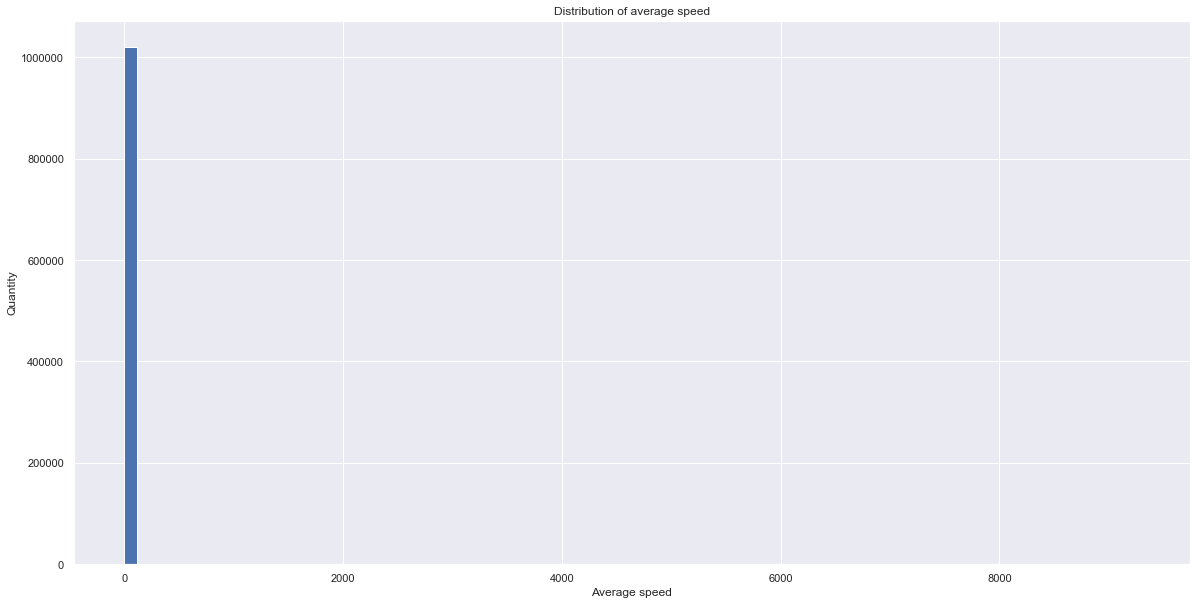

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

ax.set_title('Distribution of average speed')
ax.set_ylabel('Quantity')
ax.set_xlabel('Average speed')

ax.hist(X_train_log['aver_speed'], bins=80)
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. <br>Нарисуем гистограмму по объектам, для которых значение скорости получилось разумным <br>(например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

In [63]:
aver_speed_trunc = X_train_log['aver_speed'][X_train_log['aver_speed'] < X_train_log['aver_speed'].quantile(0.995)]

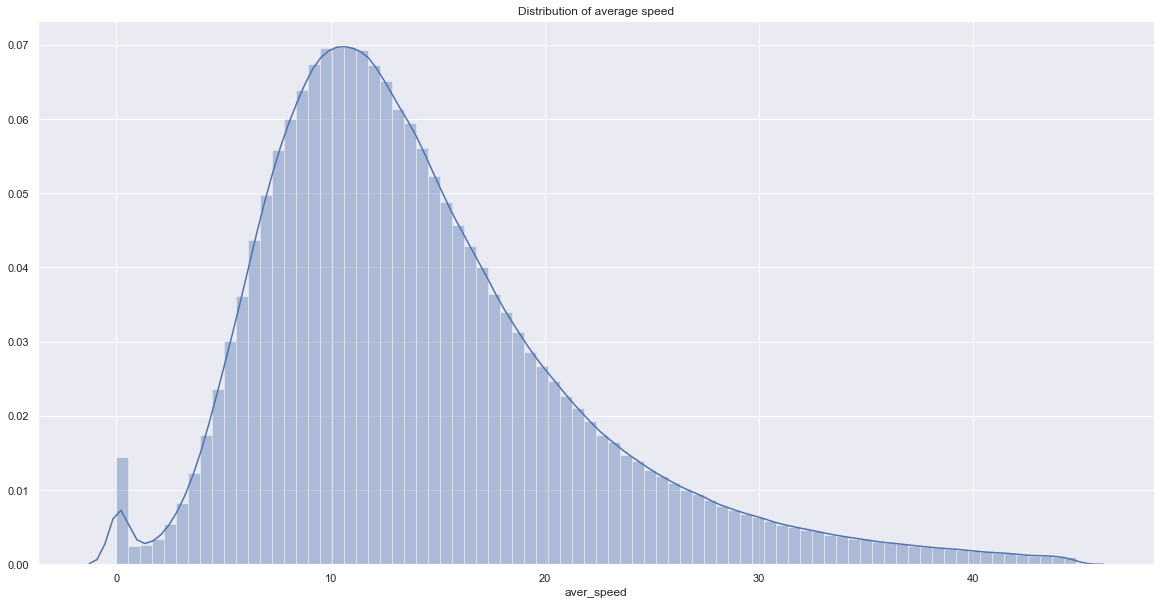

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.distplot(aver_speed_trunc, bins=80)

plt.title('Distribution of average speed')
plt.show()

Чем-то напоминает пуассоновское распределение.

Для каждой пары (день недели, час суток) посчитаем медиану скоростей. Нарисуем с помощью sns.heatmap график, <br>где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости:

In [65]:
#DataFragme.agg - aggregation using one or more operations over the specified axis

median_speed_data = X_train_log.groupby(['weekday', 'hour']).agg({'aver_speed': 'median'})

In [66]:
heatmap_data = median_speed_data.values.reshape(7,24)

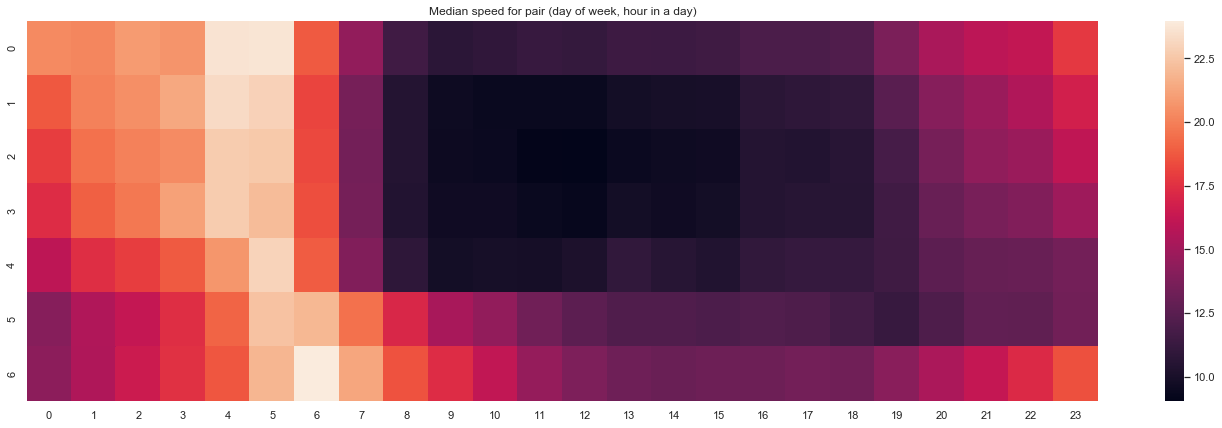

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24,7))

ax.set_title('Median speed for pair (day of week, hour in a day)')

sns.heatmap(heatmap_data)
plt.show()

Самая бездна и самая низкая скорости у нас в среду в 11-12 дня, а вот свободнее всего дороги в воскресенье в 6 утра.

Не будем использовать значение скорости во время обучения, потому что этот признак строится напрямую, используя уже известное значение длительности маршрута, причем линейным образом, что похоже на обман -- мы ведь его пытаемся предсказать.

In [68]:
X_train_log.drop('aver_speed', axis=1, inplace=True)

In [69]:
X_train_log.sample()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,hour,month,year_day,blizzard,summer_anomaly,haversine,log_haversine
831207,id2101327,2,2016-05-18 23:28:40,1,-73.955208,40.765427,-73.904022,40.745434,N,1355,2,23,5,139,0,0,4.850806,1.766579


Создадим признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог":

In [70]:
def busyRoads(row):
    return ( 
            ((row['weekday'] < 5) and (8 <= row['hour'] <= 18)) or 
            ((row['weekday'] == 5) and (row['hour'] == 19)) 
           )

def freeRoads(row):
    return ( 
            ((row['weekday'] < 4) and (0 <= row['hour'] <= 6)) or 
            ((row['weekday'] == 4) and (1 <= row['hour'] <= 6)) or
            ((row['weekday'] == 5) and (3 <= row['hour'] <= 7)) or
            ((row['weekday'] == 6) and ( (3 <= row['hour'] <= 8) or (row['hour'] == 23) ))
           )

In [71]:
X_train_log['ends_during_traf_jams'] = X_train_log.apply(busyRoads, axis=1).astype('int64')
X_test_log['ends_during_traf_jams'] = X_test_log.apply(busyRoads, axis=1).astype('int64')

X_train_log['ends_during_free_roads'] = X_train_log.apply(freeRoads, axis=1).astype('int64')
X_test_log['ends_during_free_roads'] = X_test_log.apply(freeRoads, axis=1).astype('int64')

In [72]:
X_train_log.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,hour,month,year_day,blizzard,summer_anomaly,haversine,log_haversine,ends_during_traf_jams,ends_during_free_roads
824746,id2365163,2,2016-03-27 00:25:29,3,-73.996986,40.742210,-73.987740,40.710659,N,1254,6,0,3,87,0,0,3.593845,1.524717,0,0
645821,id3126187,2,2016-03-18 20:44:12,1,-73.989929,40.741760,-73.977280,40.783600,N,970,4,20,3,78,0,0,4.772780,1.753154,0,0
691846,id2588127,2,2016-04-15 18:26:12,2,-73.972366,40.750725,-73.861832,40.768387,N,2084,4,18,4,106,0,0,9.514719,2.352776,1,0
1147931,id0915715,2,2016-03-24 14:28:34,1,-73.982361,40.776901,-73.975128,40.760921,N,980,3,14,3,84,0,0,1.878367,1.057223,1,0
183569,id3758776,1,2016-04-28 13:53:52,1,-73.973778,40.764374,-73.966957,40.761024,N,481,3,13,4,119,0,0,0.684610,0.521534,1,0


Как уже было замечено выше, на карте выделяются две точки - аэропорты La Guardia и John F Kennedy. <br>Для каждого из аэропортов добавим в выборки два признака: началась ли поездка из этого аэропорта и закончилась ли поездка в этом аэропорту:

GPS coordinates of LaGuardia Airport, United States. Latitude: 40.7730 Longitude: -73.8702.
https://latitude.to/articles-by-country/us/united-states/798/laguardia-airport

GPS coordinates of John F. Kennedy International Airport, United States. Latitude: 40.645477 Longitude: -73.781187
https://www.findlatitudeandlongitude.com/?loc=John+F+Kennedy+International+Airport+(JFK)%252C+Queens%252C+NY+11422%252C+USA#.XY06sfdS_CI

<br>
<br>
В качестве подходящей окрестности выберем две мили, благо эти точки сравнительно далеко от общего кластера и значимо повлиять даже достаточно большой радиус не должен.

In [73]:
coordLaGuardia = (40.7730, -73.8702)
coordJohnFKennedy = (40.645477, -73.781187)

In [74]:
show_circles_on_map(pd.DataFrame([coordLaGuardia, coordJohnFKennedy]*1000), 0, 1, "darkred")

Map(center=[40.70923849999967, -73.82569350000053], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [75]:
def nearAirport(airport):
    def func(latitude, longitude):
        point = (latitude, longitude)
        return haversine(point, airport, unit='mi') < 2
    
    return func

nearLaGuardia = nearAirport(coordLaGuardia)
nearJohnFKennedy = nearAirport(coordJohnFKennedy)

In [76]:
X_train_log['pickup_laguardia'] = X_train_log.apply(lambda x: nearLaGuardia(x.pickup_latitude, x.pickup_longitude), axis=1).astype('int64')
X_test_log['pickup_laguardia'] = X_test_log.apply(lambda x: nearLaGuardia(x.pickup_latitude, x.pickup_longitude), axis=1).astype('int64')

X_train_log['pickup_kennedy'] = X_train_log.apply(lambda x: nearJohnFKennedy(x.pickup_latitude, x.pickup_longitude), axis=1).astype('int64')
X_test_log['pickup_kennedy'] = X_test_log.apply(lambda x: nearJohnFKennedy(x.pickup_latitude, x.pickup_longitude), axis=1).astype('int64')

X_train_log['dropoff_laguardia'] = X_train_log.apply(lambda x: nearLaGuardia(x.dropoff_latitude, x.dropoff_longitude), axis=1).astype('int64')
X_test_log['dropoff_laguardia'] = X_test_log.apply(lambda x: nearLaGuardia(x.dropoff_latitude, x.dropoff_longitude), axis=1).astype('int64')

X_train_log['dropoff_kennedy'] = X_train_log.apply(lambda x: nearJohnFKennedy(x.dropoff_latitude, x.dropoff_longitude), axis=1).astype('int64')
X_test_log['dropoff_kennedy'] = X_test_log.apply(lambda x: nearJohnFKennedy(x.dropoff_latitude, x.dropoff_longitude), axis=1).astype('int64')

In [77]:
X_train_log.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,blizzard,summer_anomaly,haversine,log_haversine,ends_during_traf_jams,ends_during_free_roads,pickup_laguardia,pickup_kennedy,dropoff_laguardia,dropoff_kennedy
824746,id2365163,2,2016-03-27 00:25:29,3,-73.996986,40.742210,-73.987740,40.710659,N,1254,...,0,0,3.593845,1.524717,0,0,0,0,0,0
645821,id3126187,2,2016-03-18 20:44:12,1,-73.989929,40.741760,-73.977280,40.783600,N,970,...,0,0,4.772780,1.753154,0,0,0,0,0,0
691846,id2588127,2,2016-04-15 18:26:12,2,-73.972366,40.750725,-73.861832,40.768387,N,2084,...,0,0,9.514719,2.352776,1,0,0,0,1,0
1147931,id0915715,2,2016-03-24 14:28:34,1,-73.982361,40.776901,-73.975128,40.760921,N,980,...,0,0,1.878367,1.057223,1,0,0,0,0,0
183569,id3758776,1,2016-04-28 13:53:52,1,-73.973778,40.764374,-73.966957,40.761024,N,481,...,0,0,0.684610,0.521534,1,0,0,0,0,0


Для каждого из созданных признаков построим boxplot распределения логарифма времени поездки:

In [78]:
new_categorical_features = [
                            'ends_during_traf_jams',
                            'ends_during_free_roads',
                            'pickup_laguardia', 
                            'pickup_kennedy', 
                            'dropoff_laguardia', 
                            'dropoff_kennedy'
                           ]

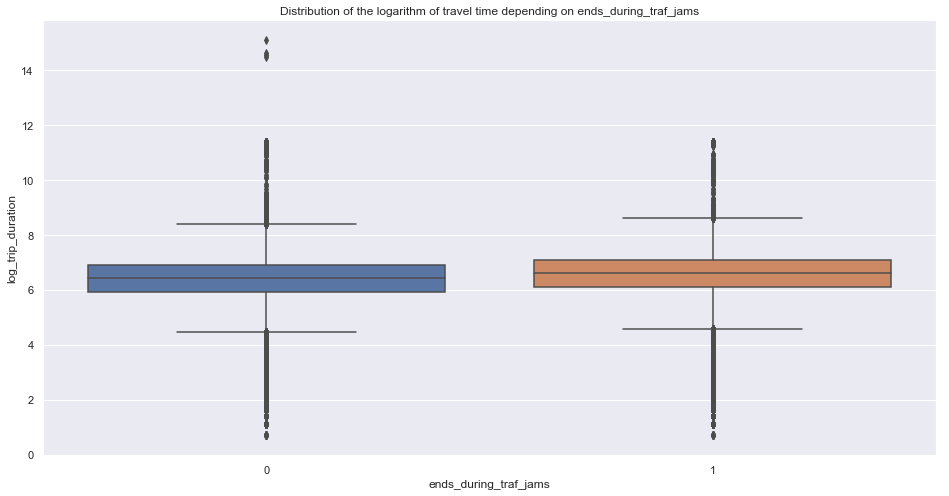

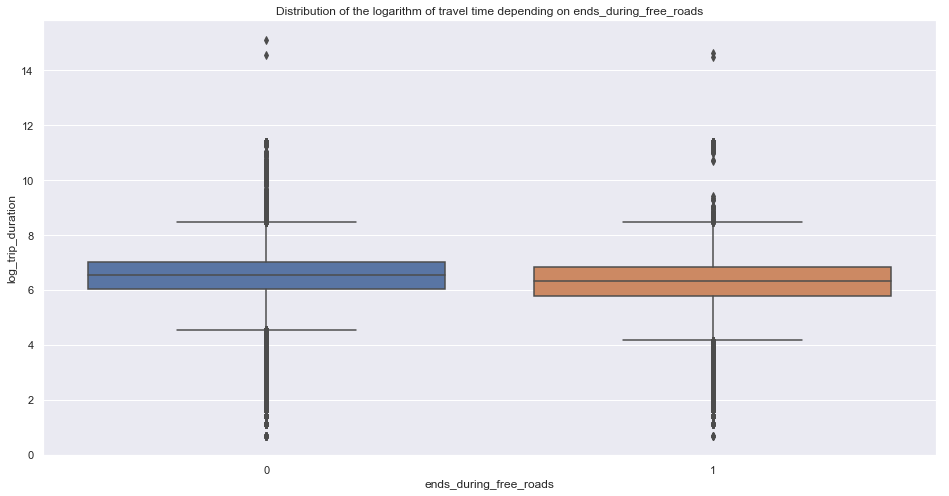

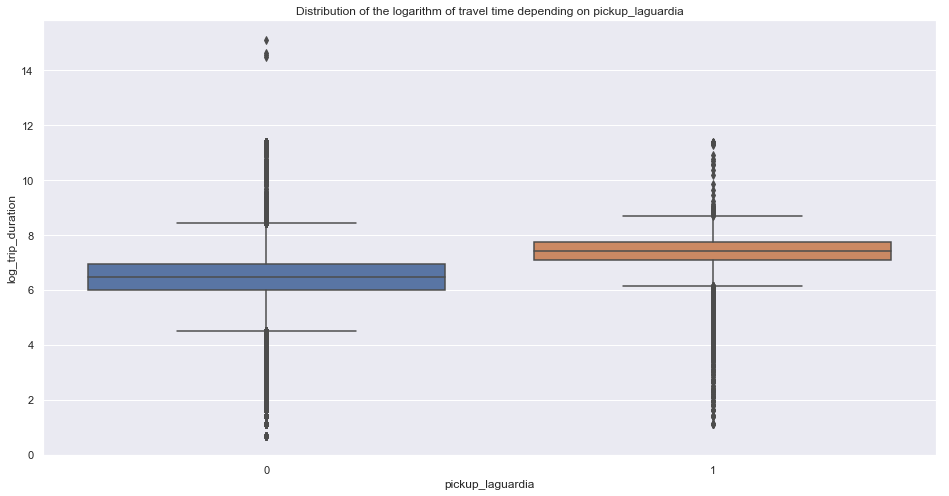

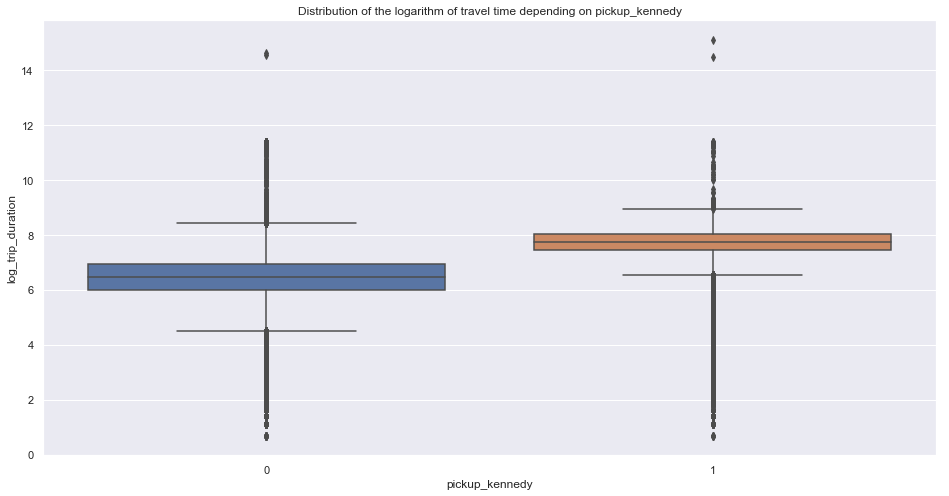

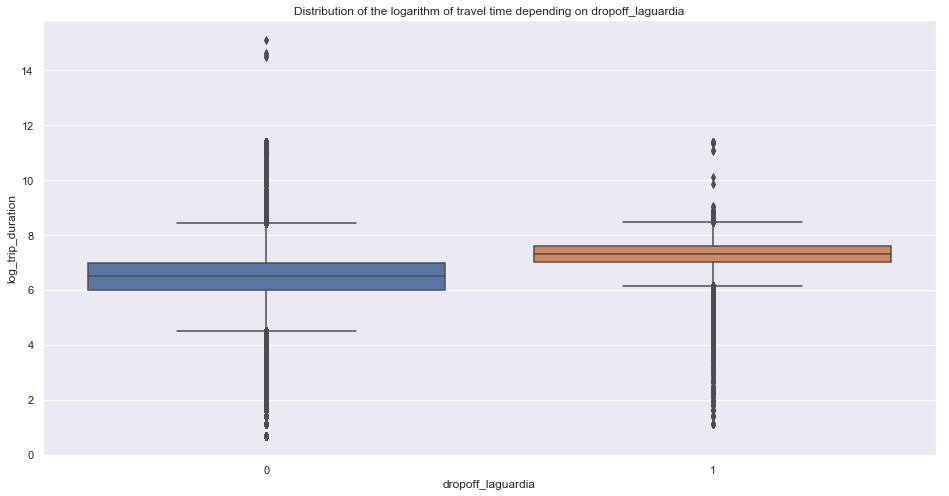

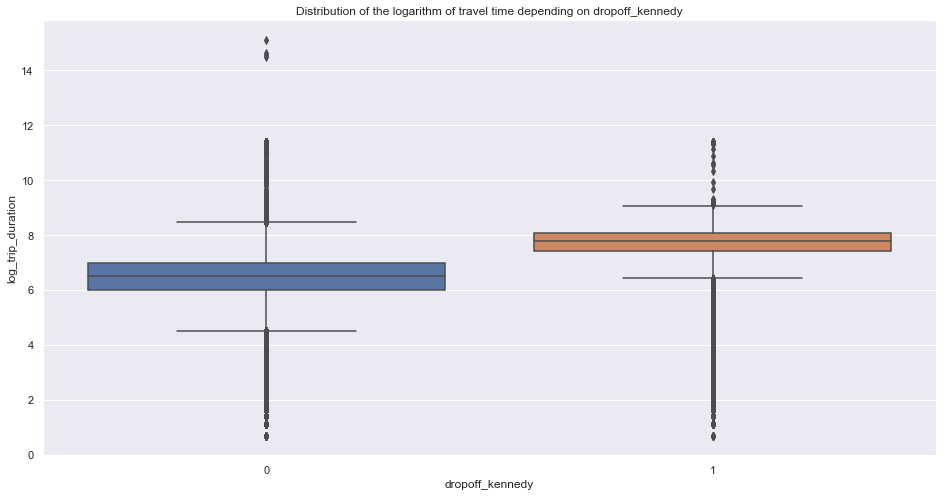

In [79]:
for feature in new_categorical_features:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
    ax.set_title(f'Distribution of the logarithm of travel time depending on {feature}')
    
    sns.boxplot(y=y_train_log, x=X_train_log[feature])
    plt.show()

"Аэропортные" признаки оказались достаточно хороши, скорее всего по причине достаточной редкости этой категории (главное чтобы переобучение не случилось), а также средненьким оказался признак свободных дорог. Пробочный работает так себе, но его можно понять: почти все поездки совершаются в это время (в Манхэттене пробки в основном из такси и состоят).

Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником. Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Для этого напишем трансформер, который сначала разбивает область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка.

Все вычисления будут векторизованными, трансформер не будет модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) будем считать только по обучающей выборке в методе fit.

*Scikit-learn provides a library of transformers, which may clean, reduce, expand or generate feature representations.*

*Like other estimators (оценщики), these are represented by classes with a fit method, which learns model parameters from a training set, and a transform method which applies this transformation model to unseen data. fit_transform may be more convenient and efficient for modelling and transforming the training data simultaneously (одновременного).*

*TransformerMixin: Mixin class for all transformers in scikit-learn.
BaseEstimator: Base class for all estimators in scikit-learn*

**-----------------**

*В scikit-learn есть специальный класс Pipeline, с помощью которого можно создавать конструктор определяющий последовательность из шагов, трансформирующих данные в нужном порядке. Вызов метода fit() запускает всю цепочку и приводит к последовательному выполнению трансформаций.*

*Чтобы создать более сложную конструкцию, можно реализовать собственный класс, а в нем три базовых метода scikit-learn — fit() (должен возвращать self), transform() (собственно сам трансформер) и fit_transform(). Для всех трех методов обязательным аргументом является X. Если унаследовать класс от TransformerMixin, то fit_transformer() можно не задавать, а если добавить в качестве базового класса BaseEstimator и не реализовывать *args, **kwargs в конструкторе, то будут доступны методы get_params() и set_params()*

In [80]:
#определяем координаты по сетке (grid) в google maps
borders = ( (40.704214, 40.776463), (-74.019354, -73.942950) )

In [81]:
borders_data = [(borders[0][0], borders[1][0]), 
                (borders[0][0], borders[1][1]), 
                (borders[0][1], borders[1][0]), 
                (borders[0][1], borders[1][1])
               ]

In [82]:
show_circles_on_map(pd.DataFrame(borders_data * 1000), 0, 1, "darkgreen")

Map(center=[40.74033849999837, -73.98115199999584], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [83]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, rows_numb, cols_numb):
        self.rows = rows_numb
        self.cols = cols_numb
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_new = X.copy()
        
        pickup_in_grid_latitude = (borders[0][0] <= X_new.pickup_latitude) & (X_new.pickup_latitude <= borders[0][1])
        pickup_in_grid_longitude = (borders[1][0] <= X_new.pickup_longitude) & (X_new.pickup_longitude <= borders[1][1])
        pickup_in_grid = pickup_in_grid_latitude & pickup_in_grid_longitude
        
        dropoff_in_grid_latitude = (borders[0][0] <= X_new.dropoff_latitude) & (X_new.dropoff_latitude <= borders[0][1])
        dropoff_in_grid_longitude = (borders[1][0] <= X_new.dropoff_longitude) & (X_new.dropoff_longitude <= borders[1][1])
        dropoff_in_grid = dropoff_in_grid_latitude & dropoff_in_grid_longitude
        
        X_new['pickup_grid'] = -1
        X_new['dropoff_grid'] = -1
        
        for ptype in ['pickup', 'dropoff']:
            in_grid = pickup_in_grid if ptype == 'pickup' else dropoff_in_grid 
            X_new['x_box'] = -1
            X_new['y_box'] = -1
            delta_x = borders[0][1] - borders[0][0]
            delta_y = borders[1][1] - borders[1][0]
            
            #The floor of the scalar x is the largest integer i, such that i <= x.
            X_new.loc[in_grid, 'x_box'] = np.floor((X_new.loc[in_grid, f'{ptype}_latitude'] - borders[0][0]) * self.cols / delta_x).astype('int64')
            X_new.loc[in_grid, 'y_box'] = np.floor((X_new.loc[in_grid, f'{ptype}_longitude'] - borders[1][0]) * self.rows / delta_y).astype('int64')
            X_new.loc[in_grid, f'{ptype}_grid'] = X_new.x_box * self.cols + X_new.y_box
        
        X_new.drop('x_box', axis=1, inplace=True)
        X_new.drop('y_box', axis=1, inplace=True)
        
        return X_new

Проверим, что трансформер работает адекватно:

In [84]:
tr = MapGridTransformer(10,10)
tr.transform(X_train_log).dropoff_grid.describe()

count    1.021050e+06
mean     4.315798e+01
std      3.456676e+01
min     -1.000000e+00
25%     -1.000000e+00
50%      5.100000e+01
75%      7.400000e+01
max      9.900000e+01
Name: dropoff_grid, dtype: float64

Обучим Ridge-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. <br>Категориальные признаки закодируем через one-hot-кодирование, численные признаки отмасштабируем:

In [85]:
X_train_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021050 entries, 824746 to 1393929
Data columns (total 24 columns):
id                        1021050 non-null object
vendor_id                 1021050 non-null int64
pickup_datetime           1021050 non-null datetime64[ns]
passenger_count           1021050 non-null int64
pickup_longitude          1021050 non-null float64
pickup_latitude           1021050 non-null float64
dropoff_longitude         1021050 non-null float64
dropoff_latitude          1021050 non-null float64
store_and_fwd_flag        1021050 non-null object
trip_duration             1021050 non-null int64
weekday                   1021050 non-null int64
hour                      1021050 non-null int64
month                     1021050 non-null int64
year_day                  1021050 non-null int64
blizzard                  1021050 non-null int64
summer_anomaly            1021050 non-null int64
haversine                 1021050 non-null float64
log_haversine             10

In [86]:
numeric_features = [
    'year_day',
    'log_haversine'
]
categorical_features = [
    'hour',
    'weekday',
    'month',
    'blizzard',
    'summer_anomaly',
    'ends_during_traf_jams',
    'ends_during_free_roads',
    'pickup_laguardia', 
    'pickup_kennedy', 
    'dropoff_laguardia', 
    'dropoff_kennedy',
    'pickup_grid',
    'dropoff_grid',
]

features = numeric_features + categorical_features

In [87]:
class ClearFeaturesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, feature_list):
        self.features = feature_list
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_new = X.copy()
        
        for column in X.columns:
            if column not in self.features:
                X_new.drop(column, axis=1, inplace=True)
        
        return X_new

In [88]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('grid_features', MapGridTransformer(25,25)),
    ('clear_features', ClearFeaturesTransformer(features)),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train_log, y_train_log)

y_pred = model.predict(X_train_log)
print("Train RMSLE = %.4f" % rmsle(y_train_log, y_pred))

y_pred = model.predict(X_test_log)
print("Test RMSLE = %.4f" % rmsle(y_test_log, y_pred))

Train RMSLE = 0.1585
Test RMSLE = 0.1584


В первой ridge-регрессии было:
<br>Train RMSLE = 0.1779
<br>Test RMSLE = 0.1777

На константе было: 
<br>Train RMSLE with best constant = 0.1783 
<br>Test RMSLE with best constant = 0.1782

---------
---------
------

У нас осталось еще 3 признака, которые мы не исследовали: vendor_id, passenger_count и store_and_fwd_flag.
<br>Посчитаем, сколько есть уникальных значений у каждого из этих признаков:

In [89]:
data['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [90]:
vendor_id_info = data['vendor_id'].drop_duplicates().sort_values()
vendor_id_info

1    1
0    2
Name: vendor_id, dtype: int64

In [91]:
data['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [92]:
passenger_count_info = data['passenger_count'].drop_duplicates().sort_values()
passenger_count_info

62744     0
0         1
12        2
36        3
6         4
69        5
5         6
433304    7
826064    8
436047    9
Name: passenger_count, dtype: int64

In [93]:
data['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [94]:
store_and_fwd_flag_info = data['store_and_fwd_flag'].drop_duplicates().sort_values()
store_and_fwd_flag_info

0      N
348    Y
Name: store_and_fwd_flag, dtype: object

Построим "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков:

In [95]:
new_features = ['vendor_id', 'passenger_count', 'store_and_fwd_flag']

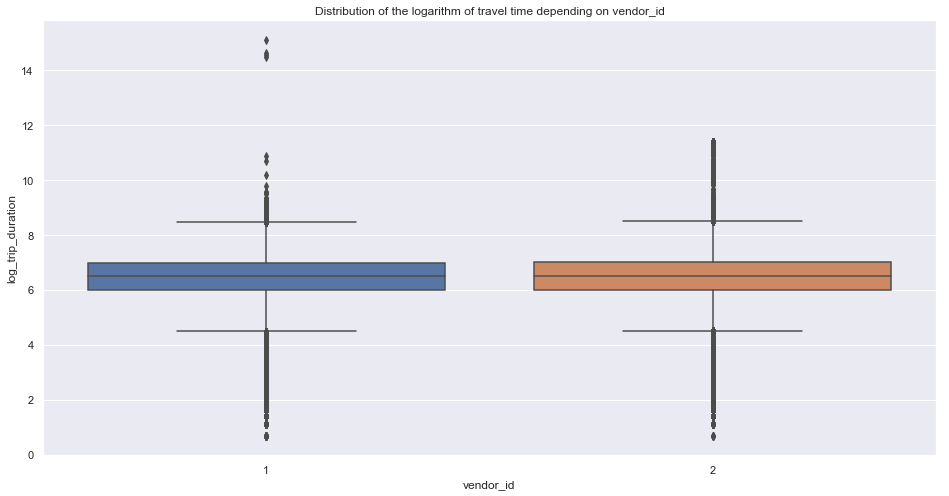

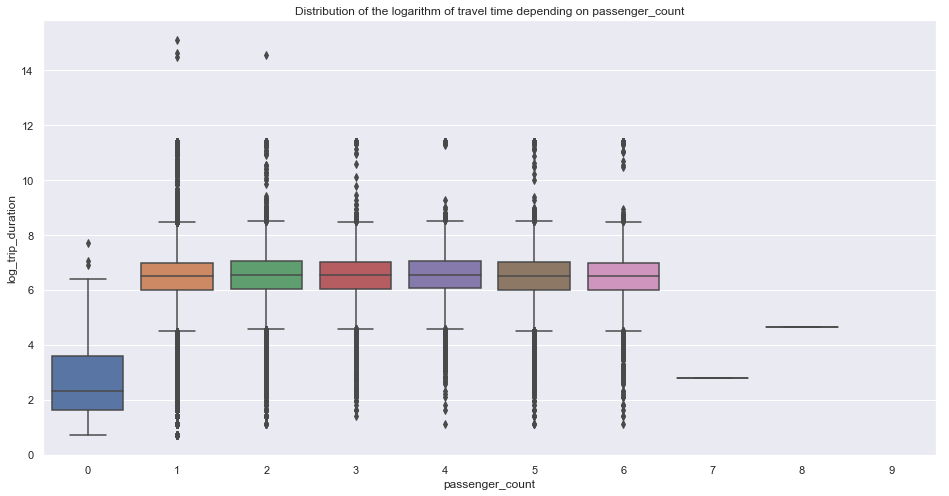

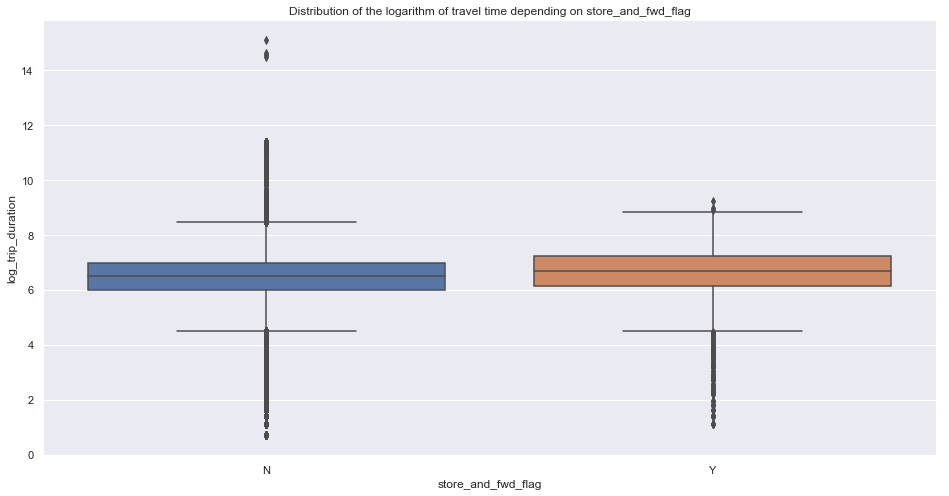

In [96]:
for feature in new_features:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
    ax.set_title(f'Distribution of the logarithm of travel time depending on {feature}')
    
    sns.boxplot(y=y_train_log, x=data[feature])
    plt.show()

Переведем признаки vendor_id и store_and_fwd_flag в значения  {0;1}:

In [97]:
X_train_log['vendor_id'] = X_train_log['vendor_id'] - 1
X_test_log['vendor_id'] = X_test_log['vendor_id'] - 1

X_train_log['store_and_fwd_flag'] = (X_train_log['store_and_fwd_flag'] == 'Y').astype('int64')
X_test_log['store_and_fwd_flag'] = (X_test_log['store_and_fwd_flag'] == 'Y').astype('int64')

In [98]:
X_train_log.head(1)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,blizzard,summer_anomaly,haversine,log_haversine,ends_during_traf_jams,ends_during_free_roads,pickup_laguardia,pickup_kennedy,dropoff_laguardia,dropoff_kennedy
824746,id2365163,1,2016-03-27 00:25:29,3,-73.996986,40.74221,-73.98774,40.710659,0,1254,...,0,0,3.593845,1.524717,0,0,0,0,0,0


Обучим Ridge-регрессию со стандартными параметрами. Категориальные признаки закодируем one-hot-кодированием, а численные отмасштабируем:

In [99]:
categorical_features += ['vendor_id', 'passenger_count', 'store_and_fwd_flag']
features = numeric_features + categorical_features

In [100]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('grid_features', MapGridTransformer(25,25)),
    ('clear_features', ClearFeaturesTransformer(features)),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train_log, y_train_log)

y_pred = model.predict(X_train_log)
print("Train RMSLE = %.4f" % rmsle(y_train_log, y_pred))

y_pred = model.predict(X_test_log)
print("Test RMSLE = %.4f" % rmsle(y_test_log, y_pred))

Train RMSLE = 0.1585
Test RMSLE = 0.1584


В последний раз было:
<br>Train RMSLE = 0.1585
<br>Test RMSLE = 0.1584

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных:

In [101]:
X_train_log.drop('vendor_id', axis=1, inplace=True)
X_train_log.drop('passenger_count', axis=1, inplace=True)
X_train_log.drop('store_and_fwd_flag', axis=1, inplace=True)

In [102]:
X_train_log.drop('id', axis=1, inplace=True)
X_test_log.drop('id', axis=1, inplace=True)

-------
-------
-----

В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. Давайте исключим такие объекты из обучающей выборки. Для этого нарисуем гистограммы распределения упомянутых выше величин, выберем объекты, которые можно назвать выбросами, и очистим обучающую выборку от них:

In [103]:
#Размер обучающей выборки
X_train_log.shape[0]

1021050

In [104]:
#Возвращаем признаки
numeric_features = [
    'year_day',
    'log_haversine'
]
categorical_features = [
    'hour',
    'weekday',
    'month',
    'blizzard',
    'summer_anomaly',
    'ends_during_traf_jams',
    'ends_during_free_roads',
    'pickup_laguardia', 
    'pickup_kennedy', 
    'dropoff_laguardia', 
    'dropoff_kennedy',
    'pickup_grid',
    'dropoff_grid',
]

features = numeric_features + categorical_features

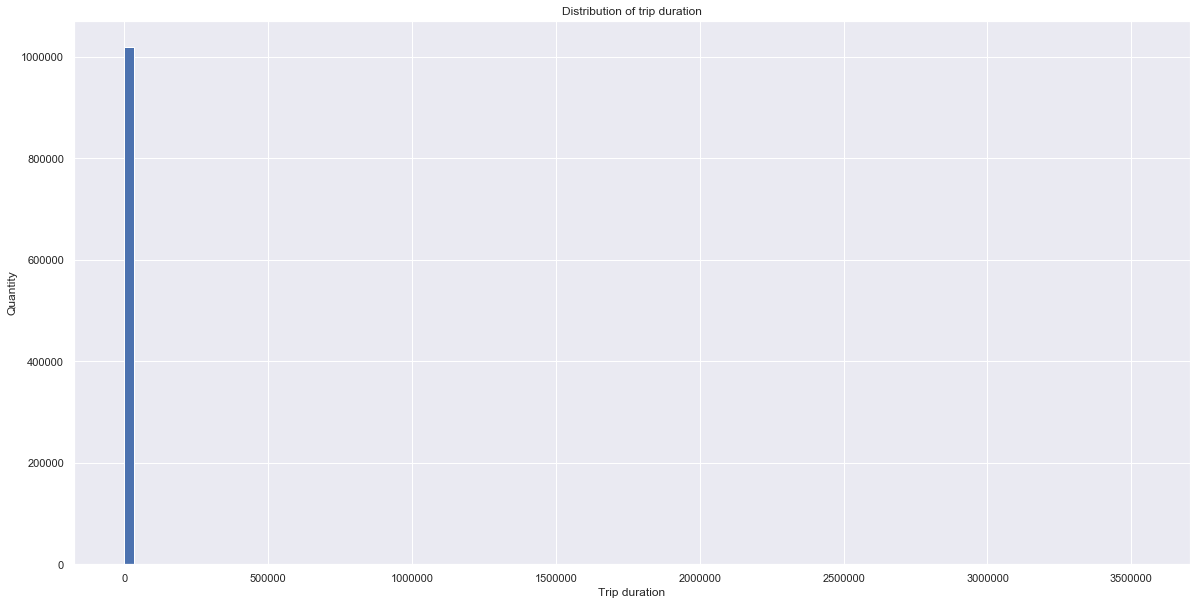

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

ax.set_title('Distribution of trip duration')
ax.set_ylabel('Quantity')
ax.set_xlabel('Trip duration')

ax.hist(y_train, bins=100)
plt.show()

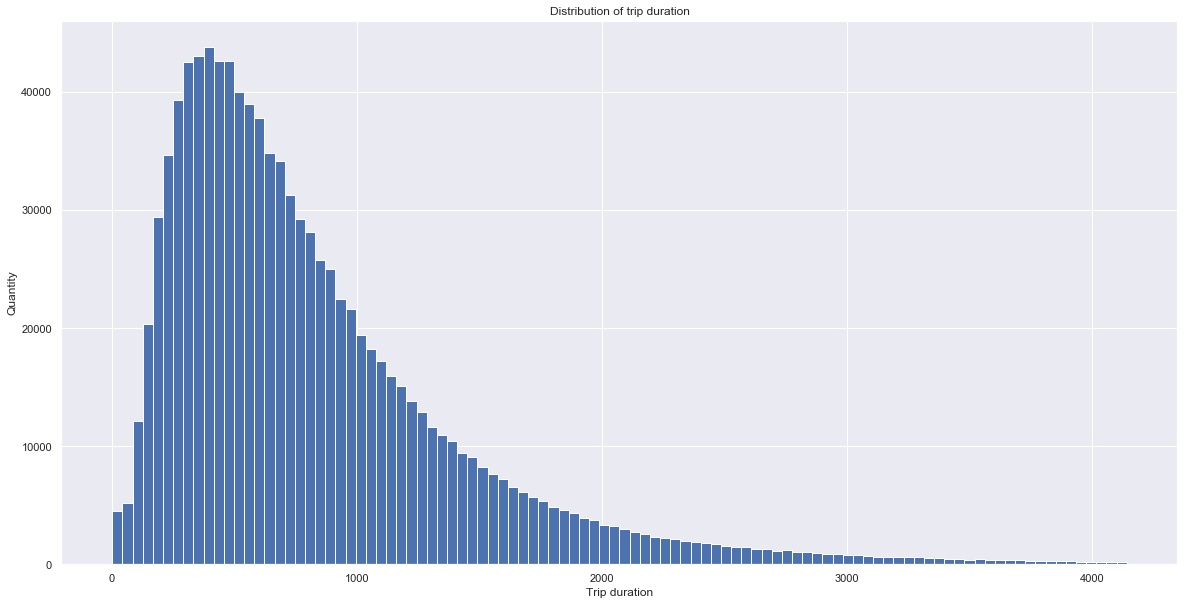

In [106]:
# Отбросим 0.995 квантиль (0.5% от выборки)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

ax.set_title('Distribution of trip duration')
ax.set_ylabel('Quantity')
ax.set_xlabel('Trip duration')

ax.hist(y_train[y_train < y_train.quantile(0.995)], bins=100)
plt.show()

In [107]:
X_train_log = X_train_log[y_train_log < y_train_log.quantile(0.995)]
y_train_log = y_train_log[y_train_log < y_train_log.quantile(0.995)]

X_train_log.shape

(1015942, 20)

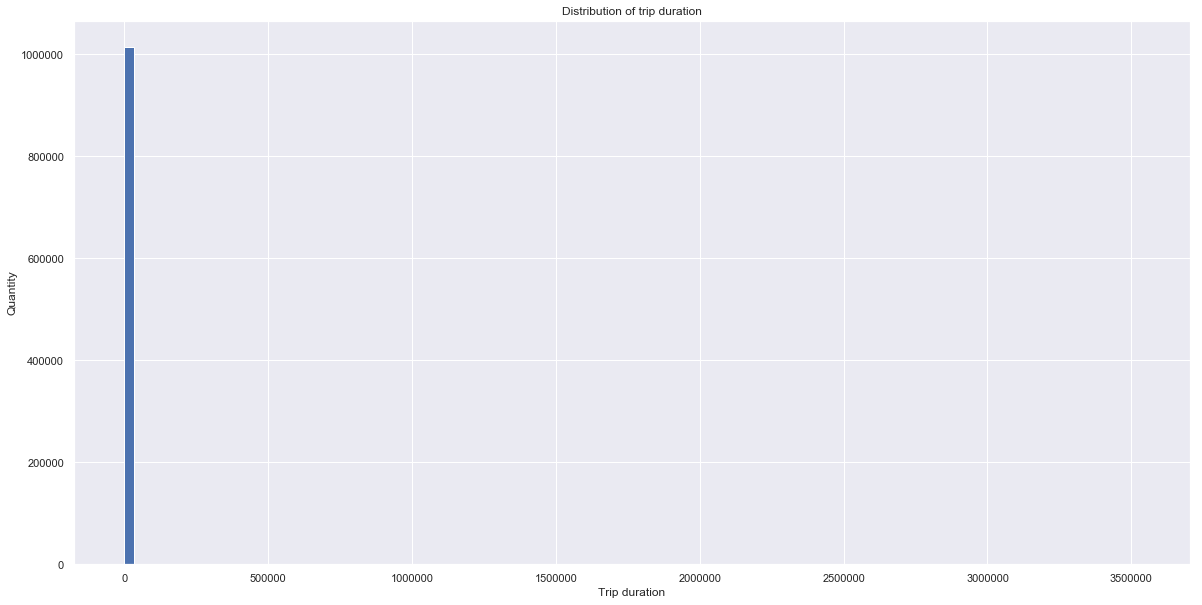

In [108]:
#Теперь отбросим аномально маленькое время
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

ax.set_title('Distribution of trip duration')
ax.set_ylabel('Quantity')
ax.set_xlabel('Trip duration')

ax.hist(y_train[y_train > y_train.quantile(0.005)], bins=100)
plt.show()

In [109]:
X_train_log = X_train_log[y_train_log > y_train_log.quantile(0.995)]
y_train_log = y_train_log[y_train_log > y_train_log.quantile(0.995)]

X_train.shape

(1021050, 9)

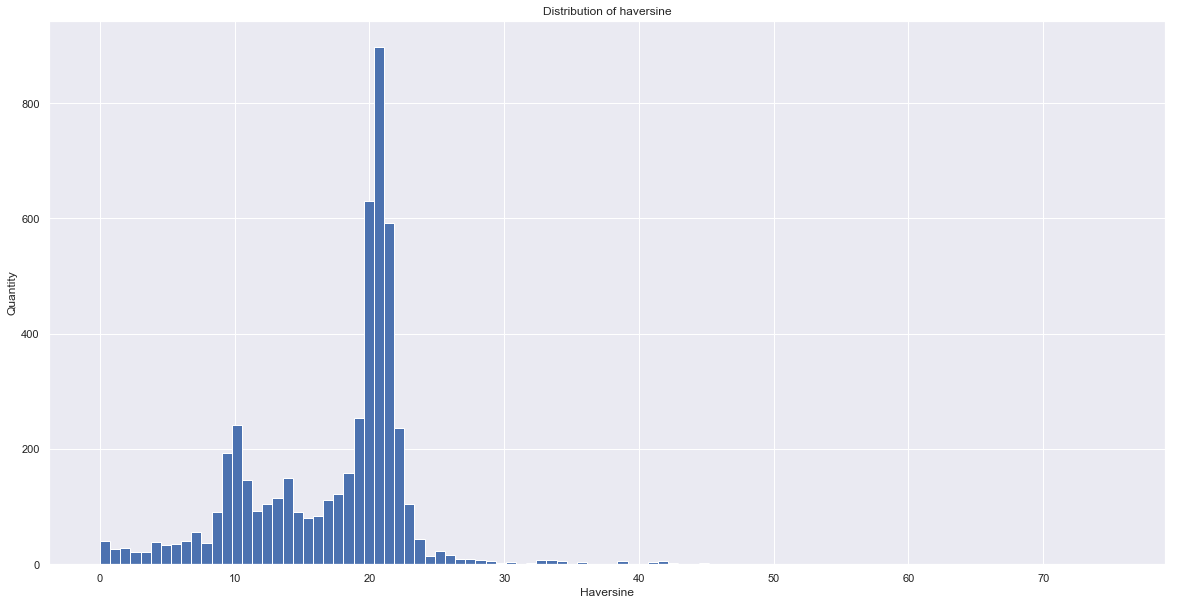

In [110]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

ax.set_title('Distribution of haversine')
ax.set_ylabel('Quantity')
ax.set_xlabel('Haversine')

ax.hist(X_train_log['haversine'], bins=100)
plt.show()

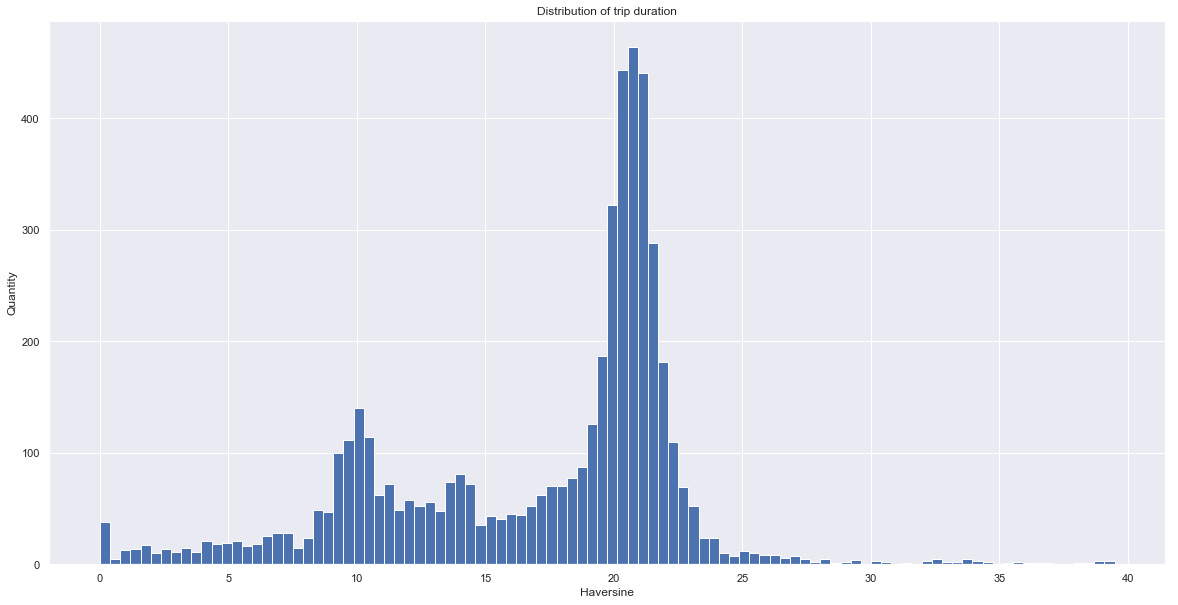

In [111]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

ax.set_title('Distribution of trip duration')
ax.set_ylabel('Quantity')
ax.set_xlabel('Haversine')

ax.hist(X_train_log['haversine'][X_train_log['haversine'] < X_train_log['haversine'].quantile(0.995)], bins=100)
plt.show()

In [112]:
y_train_log = y_train_log[X_train_log['haversine'] < X_train_log['haversine'].quantile(0.995)]
X_train_log = X_train_log[X_train_log['haversine'] < X_train_log['haversine'].quantile(0.995)]

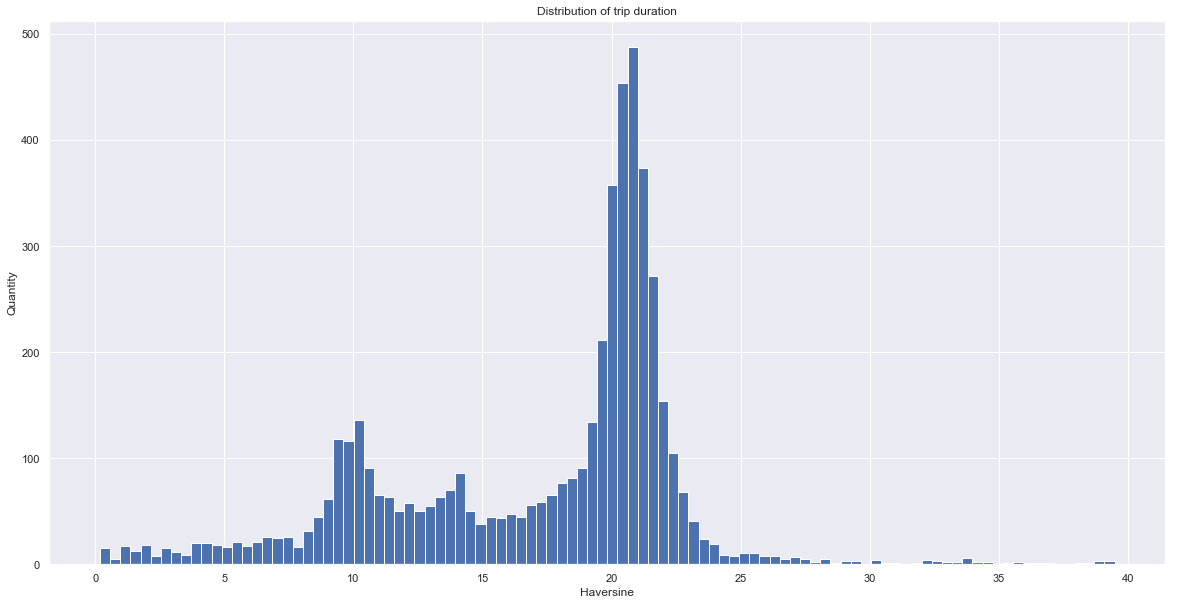

In [113]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

ax.set_title('Distribution of trip duration')
ax.set_ylabel('Quantity')
ax.set_xlabel('Haversine')

ax.hist(X_train_log['haversine'][X_train_log['haversine'] > X_train_log['haversine'].quantile(0.005)], bins=100)
plt.show()

In [114]:
y_train_log = y_train_log[X_train_log['haversine'] > X_train_log['haversine'].quantile(0.995)]
X_train_log = X_train_log[X_train_log['haversine'] > X_train_log['haversine'].quantile(0.995)]

In [115]:
# Теперь посчитаем предсказание модели на оставшихся данных и отсечем 0.5% лишних данных
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('grid_features', MapGridTransformer(25,25)),
    ('clear_features', ClearFeaturesTransformer(features)),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train_log, y_train_log)

y_pred = model.predict(X_train_log)
delta_regression = (y_train_log - y_pred)**2

In [116]:
X_train_log = X_train_log[delta_regression < delta_regression.quantile(0.95)]
y_train_log = y_train_log[delta_regression < delta_regression.quantile(0.95)]

In [117]:
X_train_log.sample()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,weekday,hour,month,year_day,blizzard,summer_anomaly,haversine,log_haversine,ends_during_traf_jams,ends_during_free_roads,pickup_laguardia,pickup_kennedy,dropoff_laguardia,dropoff_kennedy
636083,2016-05-15 01:57:23,-73.99099,40.76083,-74.117462,41.049751,4002,6,1,5,136,0,0,33.839197,3.550743,0,0,0,0,0,0


Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель переобучается на таких примерах. Попробуем объединить редкие категории в одну:

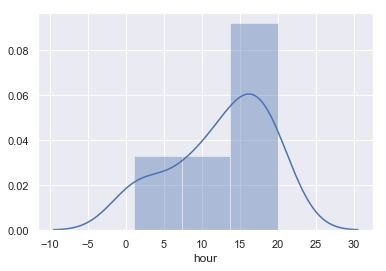

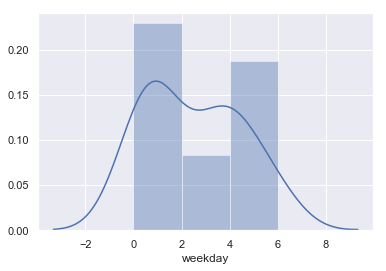

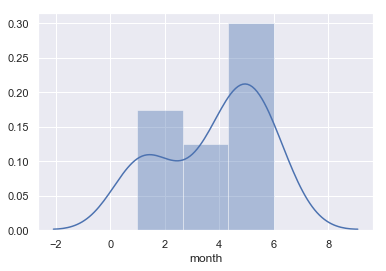

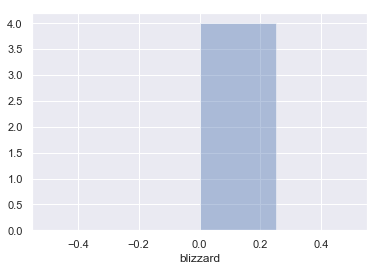

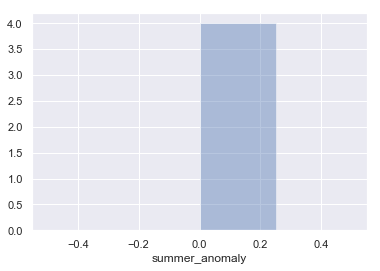

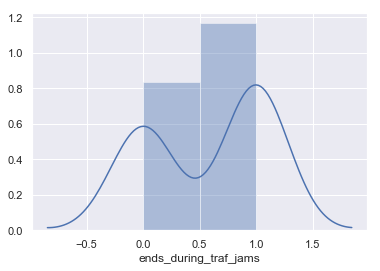

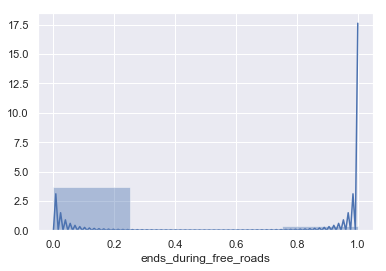

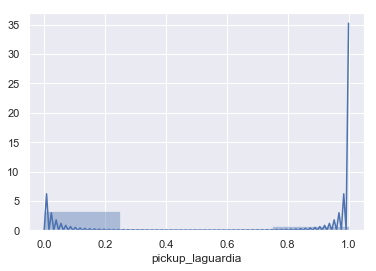

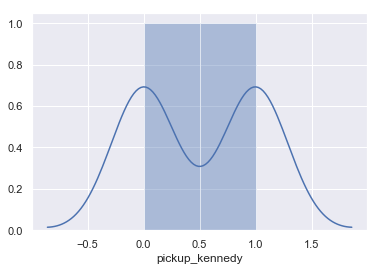

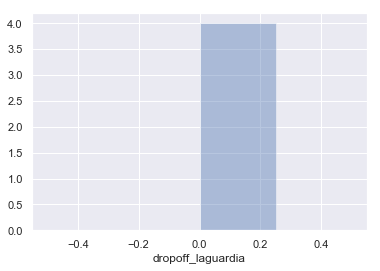

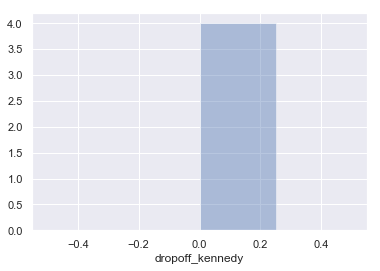

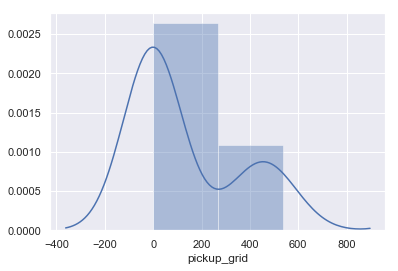

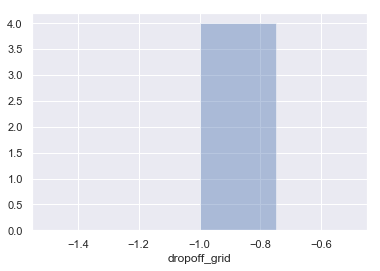

In [118]:
# Построим гистограммы по категориальным признакам
for feature in categorical_features:
    transformer = MapGridTransformer(25,25)
    sns.distplot(transformer.transform(X_train_log)[feature])
    
    plt.show()

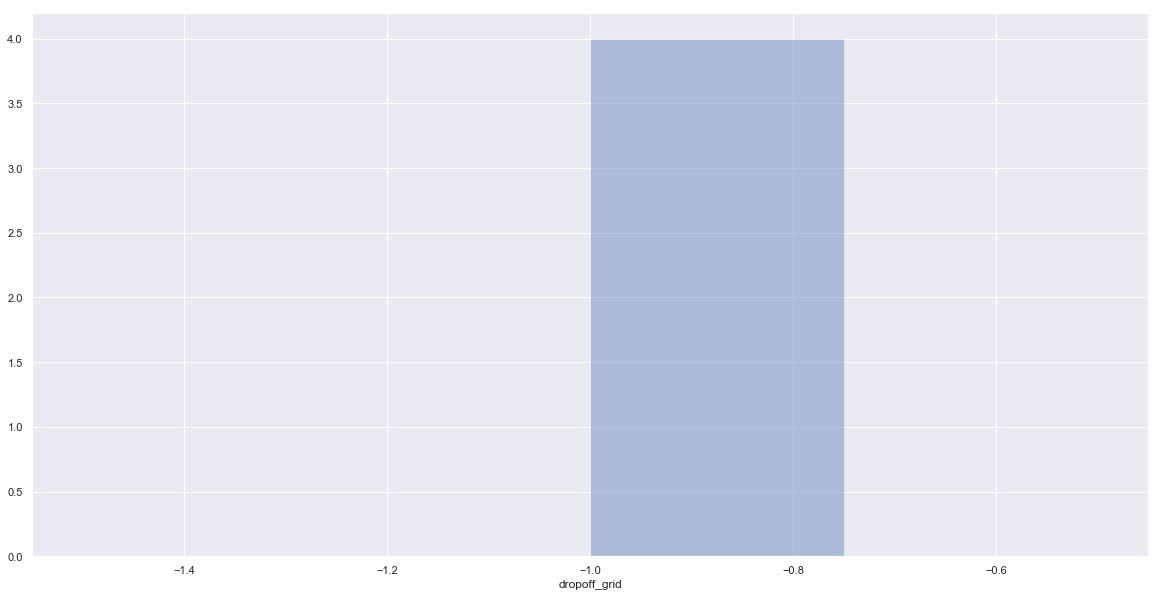

In [119]:
fig = plt.figure(figsize=(20,10))
sns.distplot(transformer.transform(X_train_log)['dropoff_grid'])
plt.show()

In [120]:
X_train_log.loc[(3 <= X_train_log['hour']) & (X_train_log['hour'] <= 5), 'hour'] = 3
X_test_log.loc[(3 <= X_test_log['hour']) & (X_train_log['hour'] <= 5), 'hour'] = 3

In [121]:
class MergeFeaturesTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_new = X.copy()
        for feature in ['pickup_grid', 'dropoff_grid']:
            X_new.loc[X_new[feature] <= 50, feature] = 0
            X_new.loc[X_new[feature] >= 700, feature] = 700
            
        return X_new

Обучим модель на очищенных данных и посчитаем качество на тестовой выборке:

In [122]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('grid_features', MapGridTransformer(25,25)),
    ('clear_features', ClearFeaturesTransformer(features)),
    ('merge_grid', MergeFeaturesTransformer()),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train_log, y_train_log)

y_pred = model.predict(X_train_log)
print("Train RMSLE = %.4f" % rmsle(y_train_log, y_pred))

y_pred = model.predict(X_test_log)
print("Test RMSLE = %.4f" % rmsle(y_test_log, y_pred))

Train RMSLE = 0.1143
Test RMSLE = 0.1718


В почти последний раз было: 
<br>Train RMSLE = 0.1585 
<br>Test RMSLE = 0.1584

После OneHot-кодирования количество признаков в нашем датасете значительно возрастает. Посчитаем колиество признаков до и после кодирования категориальных признаков:

In [123]:
pipeline_transform = Pipeline(steps=[
    ('grid_features', MapGridTransformer(25,25)),
    ('clear_features', ClearFeaturesTransformer(features)),
    ('merge_grid', MergeFeaturesTransformer()),
    ('ohe_and_scaling', column_transformer)
])

In [124]:
print("Before:", X_train_log.shape)
print("After:", pipeline_transform.transform(X_train_log).shape)

Before: (24, 20)
After: (24, 49)


Попробуем обучить не Ridge-, а Lasso-регрессию:

In [125]:
from sklearn.linear_model import Lasso

In [126]:
lasso_pipeline = Pipeline(steps=[
    ('grid_features', MapGridTransformer(25,25)),
    ('clear_features', ClearFeaturesTransformer(features)),
    ('merge_grid', MergeFeaturesTransformer()),
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train_log, y_train_log)

y_pred = model.predict(X_train_log)
print("Train RMSLE = %.4f" % rmsle(y_train_log, y_pred))

y_pred = model.predict(X_test_log)
print("Test RMSLE = %.4f" % rmsle(y_test_log, y_pred))

Train RMSLE = 0.1144
Test RMSLE = 0.1551


Было:
<br>Train RMSLE = 0.1143
<br>Test RMSLE = 0.1718

Разобьем обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберем оптимальное значение параметра регуляризации (по логарифмической сетке), на тестовой выборке измерим качество полученной модели:

In [127]:
X_train_train, X_valid, y_train_train, y_valid = train_test_split(X_train_log, y_train_log, test_size=0.2, random_state=42)

X_train_transformed = pipeline_transform.transform(X_train_train)
X_valid_transformed = pipeline_transform.transform(X_valid)

Text(0, 0.5, 'Score')

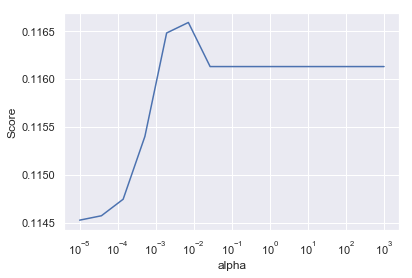

In [128]:
alphas = np.logspace(-5, 3, 15)
result = []
zero_weights = []

for alpha in alphas:
    model = Lasso(alpha).fit(X_train_transformed, y_train_train)
    result.append(rmsle(model.predict(X_valid_transformed), y_valid))
    zero_weights.append(sum([coef == 0 for coef in model.coef_]))

plt.plot(alphas, result)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("Score")

In [129]:
model = Lasso(1e-5).fit(pipeline_transform.transform(X_train_log), y_train_log)

y_pred = model.predict(pipeline_transform.transform(X_train_log))
print("Train RMSLE = %.4f" % rmsle(y_train_log, y_pred))

y_pred = model.predict(pipeline_transform.transform(X_test_log))
print("Test RMSLE = %.4f" % rmsle(y_test_log, y_pred))

Train RMSLE = 0.1143
Test RMSLE = 0.1514


Было: 
<br>Train RMSLE = 0.1144
<br>Test RMSLE = 0.1551

Для каждого перебранного alpha посчитаем количество нулевых весов в модели и нарисуем график зависимости его от alpha:

Text(0, 0.5, 'zero weights')

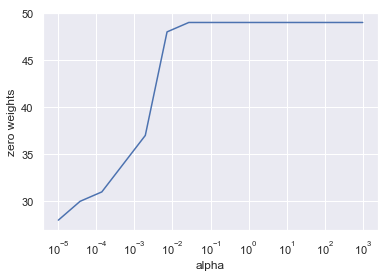

In [130]:
plt.plot(alphas, zero_weights)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("zero weights")

Результат получился примерно таким же, какой был раньше, но теперь у нас около 300 весов нулевые, что облегчает нашу модель.

Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими редкими парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

In [131]:
class PairTransportTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pairs):
        self.pair_cnt = pairs
    
    def fit(self, X, y=None):
        pairs_stat = X.loc[(X['pickup_grid'] >= 0) & (X['dropoff_grid'] >= 0), ['pickup_grid', 'dropoff_grid']]
        pairs_stat['count'] = 1
        pairs = pairs_stat.groupby(['pickup_grid', 'dropoff_grid']).agg({
                                                                    'count' : 'sum'
                                                                    }).sort_values('count', ascending=False)[:self.pair_cnt]
        pairs.reset_index(inplace=True)
        
        self.pairs_dict = { (row[1].pickup_grid, row[1].dropoff_grid) : row[0] for row in pairs.iterrows()}
        
        return self
    
    def transform(self, X):
        X_new = X.copy()
        # Мы перевернули как бы порядок потому что хотим поощрять дополнительно за высокие места
        X_new['pair_grid'] = X_new.apply(
                                        lambda row: 100 - self.pairs_dict.get(
                                            (row.pickup_grid, row.dropoff_grid), -1),
                                        axis=1
                                        )
        
        return X_new

In [132]:
# Проверяем работоспособность
tr0 =  MapGridTransformer(25,25)
X_train_t = tr0.transform(X_train)
tr = PairTransportTransformer(100)
tr.fit_transform(X_train_t).sample()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_grid,dropoff_grid,pair_grid
634999,id1846651,1,2016-05-02 07:48:32,1,-73.990448,40.756191,-73.781776,40.644402,N,434,-1,101


Переобучим модель на новых даннных и посчитаем качество на тестовой выборке:

In [133]:
numeric_features = [
    'year_day',
    'log_haversine'
]
categorical_features = [
    'hour',
    'weekday',
    'month',
    'blizzard',
    'summer_anomaly',
    'ends_during_traf_jams',
    'ends_during_free_roads',
    'pickup_laguardia', 
    'pickup_kennedy', 
    'dropoff_laguardia', 
    'dropoff_kennedy',
    'pickup_grid',
    'dropoff_grid',
    'pair_grid'
]

features = numeric_features + categorical_features

In [134]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

In [135]:
lasso_best_pipeline = Pipeline(steps=[
    ('grid_features', MapGridTransformer(25,25)),
    ('pair_features', PairTransportTransformer(100)),
    ('clear_features', ClearFeaturesTransformer(features)),
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(1e-5))
])

model = lasso_best_pipeline.fit(X_train_log, y_train_log)

In [136]:
y_pred = model.predict(X_train_log)
print("Train RMSLE = %.4f" % rmsle(y_train_log, y_pred))

y_pred = model.predict(X_test_log)
print("Test RMSLE = %.4f" % rmsle(y_test_log, y_pred))

Train RMSLE = 0.1143
Test RMSLE = 0.1514


Было: 
<br>Train RMSLE = 0.1143
<br>Test RMSLE = 0.1514

In [137]:
ridge_pipeline = Pipeline(steps=[
    ('grid_features', MapGridTransformer(25,25)),
    ('pair_features', PairTransportTransformer(100)),
    ('clear_features', ClearFeaturesTransformer(features)),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = ridge_pipeline.fit(X_train_log, y_train_log)

In [138]:
y_pred = model.predict(X_train_log)
print("Train RMSLE = %.4f" % rmsle(y_train_log, y_pred))

y_pred = model.predict(X_test_log)
print("Test RMSLE = %.4f" % rmsle(y_test_log, y_pred))

Train RMSLE = 0.1143
Test RMSLE = 0.1718


---------
--------
------

Манхэтенское расстояние -- это расстояние по $\ell_1$-норме, то есть
$$
    d_1(x,y) = \sum_{i=1}^n \vert x_i - y_i \vert
$$

Введем систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавим сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака.

Посчитайте корреляцию между новыми признаком и таргетом; между log_haversine и таргетом.

Нарисуем карту, где отобразим выбранные оси.

In [139]:
# Haversine считает расстояние с учетом кривизны Земли и всего прочего, но площадь Манхэттена и окружающих территорий 
# достаточно маленькая, так что мы можем считать планету локально-плоской в этой точке 
# Так что с точностью до коэффициента пропорциональности расстояние будет как раз по определению выше.

In [140]:
affine_frame = np.array([40.768808, -73.958388])
x_point = np.array([40.769493, -73.957894])
y_point = np.array([40.769749, -73.960599])

In [141]:
x_axis = x_point - affine_frame
y_axis = y_point - affine_frame

print(x_axis, y_axis)

[0.000685 0.000494] [ 0.000941 -0.002211]


In [142]:
from ipyleaflet import Map, Polyline

result_map = Map(center=affine_frame.tolist(), zoom=14, basemap=basemaps.Esri.NatGeoWorldMap)

polyline = Polyline(locations=[
                                (x_axis*200 + affine_frame).tolist(), 
                                affine_frame.tolist(), 
                                (y_axis*100 + affine_frame).tolist()
                              ], color = "green", fill_color= "green")

result_map.add_layer(polyline)
result_map

Map(center=[40.768808, -73.958388], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

Вычислим нужную матрицу замены координат:

In [143]:
from numpy.linalg import inv

C_coord = inv(np.concatenate([x_axis, y_axis]).reshape(2,2))
C_coord

array([[1117.01136058,  249.57196388],
       [ 475.39922673, -346.06638715]])

In [144]:
class PairTransportTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        
        return self
    
    def transform(self, X):
        X_new = X.copy()
        
        pickup_point = (X_new[['pickup_latitude', 'pickup_longitude']] - affine_frame) @ C_coord
        dropoff_point = (X_new[['dropoff_latitude', 'dropoff_longitude']] - affine_frame) @ C_coord
        delta = pickup_point - dropoff_point
        
        X_new['manh_distance'] = np.abs(delta.iloc[:,0]) + np.abs(delta.iloc[:,1])
        X_new['log_manh_distance'] = np.log1p(X_new['manh_distance'])
        
        return X_new

In [145]:
tr = PairTransportTransformer()
tr.transform(X_train_log).sample()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,weekday,hour,month,year_day,...,haversine,log_haversine,ends_during_traf_jams,ends_during_free_roads,pickup_laguardia,pickup_kennedy,dropoff_laguardia,dropoff_kennedy,manh_distance,log_manh_distance
641406,2016-05-31 17:24:17,-73.789543,40.646946,-73.423035,40.783211,3847,1,17,5,152,...,34.405952,3.56688,1,0,0,1,0,0,419.275574,6.040911


In [146]:
X_train_log = tr.transform(X_train_log)
X_test_log = tr.transform(X_test_log)

In [147]:
print("Log haversine:", np.corrcoef(X_train_log['log_haversine'], y_train_log)[0][1])
print("Haversine:", np.corrcoef(X_train_log['haversine'], y_train_log)[0][1])
print()
print("Log manh distance:", np.corrcoef(X_train_log['log_manh_distance'], y_train_log)[0][1])
print("Manh distance:", np.corrcoef(X_train_log['manh_distance'], y_train_log)[0][1])

Log haversine: -0.10946998185827063
Haversine: -0.10289818176048825

Log manh distance: -0.08963082273279863
Manh distance: -0.08450984342695163


Коррелирует чуть-чуть хуже, но не особо значительно. Посмотрим, как коррелируют между собой наши точки:

In [148]:
print("Correlation between features:", np.corrcoef(X_train_log['log_manh_distance'], X_train_log['log_haversine'])[0][1])

Correlation between features: 0.4073243813730418


Переобучим модель на новых даннных и посчитаем качество на тестовой выборке:

In [149]:
numeric_features = [
    'year_day',
    'log_haversine',
    'log_manh_distance'
    
]
categorical_features = [
    'hour',
    'weekday',
    'month',
    'blizzard',
    'summer_anomaly',
    'ends_during_traf_jams',
    'ends_during_free_roads',
    'pickup_laguardia', 
    'pickup_kennedy', 
    'dropoff_laguardia', 
    'dropoff_kennedy',
    'pickup_grid',
    'dropoff_grid',
    'pair_grid'
]

features = numeric_features + categorical_features

In [150]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

In [151]:
class PairTransportTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pairs):
        self.pair_cnt = pairs
    
    def fit(self, X, y=None):
        
        return self
    
    def transform(self, X):
        X_new = X.copy()
        
        pickup_point = (X_new[['pickup_latitude', 'pickup_longitude']] - affine_frame) @ C_coord
        dropoff_point = (X_new[['dropoff_latitude', 'dropoff_longitude']] - affine_frame) @ C_coord
        delta = pickup_point - dropoff_point
        
        X_new['manh_distance'] = np.abs(delta.iloc[:,0]) + np.abs(delta.iloc[:,1])
        X_new['log_manh_distance'] = np.log1p(X_new['manh_distance'])
        
        return X_new

In [ ]:
#Don't know, what it wants

lasso_best_pipeline = Pipeline(steps=[
    ('grid_features', MapGridTransformer(25,25)),
    ('pair_features', PairTransportTransformer(100)),
    ('clear_features', ClearFeaturesTransformer(features)),
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(1e-5))
])

model = lasso_best_pipeline.fit(X_train_log, y_train_log)

y_pred = model.predict(X_train_log)
print("Train RMSLE = %.4f" % rmsle(y_train_log, y_pred))

y_pred = model.predict(X_test_log)
print("Test RMSLE = %.4f" % rmsle(y_test_log, y_pred))

Было: 
<br>Train RMSLE = 0.1143
<br>Test RMSLE = 0.1514

In [ ]:
#Don't know, what it wants

ridge_pipeline = Pipeline(steps=[
    ('grid_features', MapGridTransformer(25,25)),
    ('pair_features', PairTransportTransformer(100)),
    ('clear_features', ClearFeaturesTransformer(features)),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = ridge_pipeline.fit(X_train_log, y_train_log)

y_pred = model.predict(X_train_log)
print("Train RMSLE = %.4f" % rmsle(y_train_log, y_pred))

y_pred = model.predict(X_test_log)
print("Test RMSLE = %.4f" % rmsle(y_test_log, y_pred))